In [11]:
# import keras
# DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
# keras.__version__

'2.3.1'

Data preprocessing

In [3]:
import numpy as np
import pickle
def getData(datasetName):
    with open(datasetName,'rb') as file_in:
#         features, labels, setups, cameras, performers, replications = pickle.load(file_in)
        train_set, val_set, test_set = pickle.load(file_in)
    
    #### stats ################################
    nOfZeros = np.count_nonzero(train_set[0]==0)
    nOfZeros += np.count_nonzero(val_set[0]==0)
    nOfZeros += np.count_nonzero(test_set[0]==0)
    print("number of zeros(before padding): {}".format(nOfZeros))
    print("Train dataset shape: ", train_set[0].shape)
    print("Validation dataset shape: ", val_set[0].shape)
    print("Test dataset shape: ", test_set[0].shape)
    return train_set, val_set, test_set

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [ ]:
# max(acc),max(val_acc),min(loss),min(val_loss)

In [ ]:
# np.argmax(val_acc)

## Display results

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
# ACTION_LABEL_SET = 
    # A001  - A002 - A023          - A031               -  A049     - A007  - A008     - A009         
    # drink - eat -  hand waving   - point to something - use a fan - throw - sit down - standing up
def getValTestAccuracy(model,x_val,y_val,x_test,y_test, label_order = [1, 2, 31, 38, 49, 7, 8, 9]):
    y_val_pred = [label_order[i] for i in model.predict_classes(x_val)]
    y_val_true = [label_order[np.argmax(i)] for i in y_val]
    y_test_pred = [label_order[i] for i in model.predict_classes(x_test)]
    y_test_true = [label_order[np.argmax(i)] for i in y_test]
    val_acc = accuracy_score(y_pred=y_val_pred,y_true=y_val_true)
    test_acc = accuracy_score(y_pred=y_test_pred,y_true=y_test_true)
    return val_acc, test_acc
        
def plotValTestResult(model, x_val, y_val, x_test, y_test, label_order = [1, 2, 31, 38, 49, 7, 8, 9]):
    y_val_pred = [label_order[i] for i in model.predict_classes(x_val)]
    y_val_true = [label_order[np.argmax(i)] for i in y_val]
    y_test_pred = [label_order[i] for i in model.predict_classes(x_test)]
    y_test_true = [label_order[np.argmax(i)] for i in y_test]
    val_acc = accuracy_score(y_pred=y_val_pred,y_true=y_val_true)
    test_acc = accuracy_score(y_pred=y_test_pred,y_true=y_test_true)
    print("Val acc:",val_acc)
    print("Test acc:",test_acc)
    conf_mat_val= confusion_matrix(y_true=y_val_true, y_pred=y_val_pred, labels=label_order)            
    conf_mat_test = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred, labels=label_order)
    plotConfusionMatrixes(conf_mat_val,conf_mat_test)
    return val_acc, test_acc

import seaborn as sn
def plotConfusionMatrixes(conf_mat_val, conf_mat_test, labelString = ["drink", "eat", "hand wave", "point-to", "fan", "throw", "sit-down", "stand-up"]):
    plt.figure(figsize = (15,7))
    ax1 = plt.subplot(1, 2, 1)
    ax1 = sn.heatmap(conf_mat_val, annot=True,xticklabels=labelString,yticklabels=labelString, fmt='g')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title("VALIDATION SET", fontsize = 20) # title with fontsize 20
    plt.xlabel('Pred', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('True', fontsize = 15) # y-axis label with fontsize 15
    
    ax2 = plt.subplot(1, 2, 2)
    ax2 = sn.heatmap(conf_mat_test, annot=True,xticklabels=labelString,yticklabels=labelString, fmt='g')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title("TEST SET", fontsize = 20) # title with fontsize 20
    plt.xlabel('Pred', fontsize = 15) # x-axis label with fontsize 15

    plt.show()
    

## display model results

In [2]:
def fromFileNameToModel(fileName):
    parsedName = fileName.name[:-3].split("-")
    
    normalise = False
    if parsedName[-1]=="norm":
        normalise = True
        parsedName = parsedName[:-1]
        
    modelName = parsedName[0]
    parsedName = parsedName[1:]
    if modelName == "PoseNet":
        modelName += "-"+parsedName[0]
        parsedName = parsedName[1:]
    
#     preprocess_functions = [functionMap[i] for i in parsedName]
    return modelName, normalise

In [ ]:
# import dill
# from sklearn.preprocessing import LabelBinarizer
# from keras.preprocessing.sequence import pad_sequences

# MODEL_NAME = "PoseNet-101"
# MODEL_NAME = "keypoint_rcnn_X_101_32x8d_FPN_3x"
# DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
# datasetName = DATASET_FOLDER+MODEL_NAME+"-SPLIT-dataset.pickle"
# train_set, val_set, test_set = getData(datasetName)


# with open('/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/PoseNet-101-relativeToNextFrame.pickle',"rb") as handle:
#     res = pickle.load(handle)
    
# loaded_functions = [dill.loads(x) for x in res["prep_fun_DILL"]]

# one_hot_encoding = loaded_functions[0]
# normaliseBeforePadding = loaded_functions[1]
# paddingTrainValTest = loaded_functions[2]
# preprocessData = loaded_functions[3]
# relativeToNextFrame = loaded_functions[4]

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
## skipped model keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter.h5 ## 
## skipped model keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter-norm.h5 ## 
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5
Val acc: 0.86

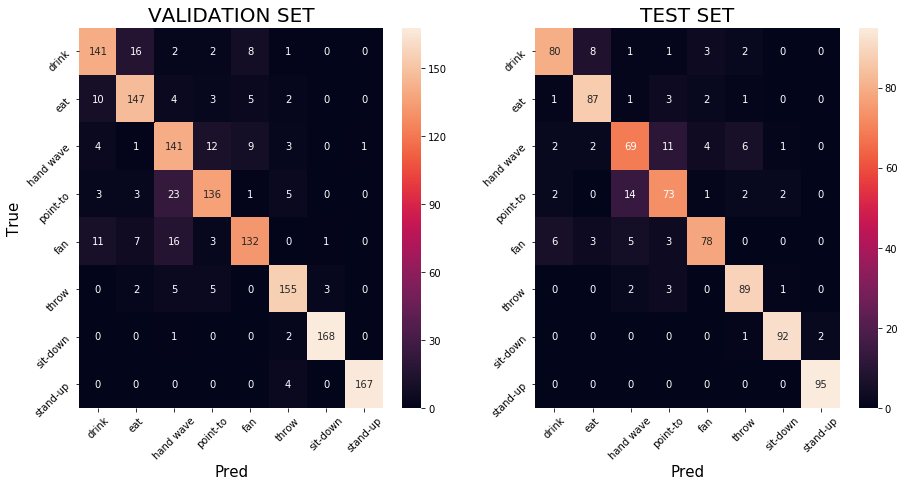

PoseNet-101-relativeToVideoCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToVideoCenter.h5
Val acc: 0.2915750915750916
Test acc: 0.2845849802371542


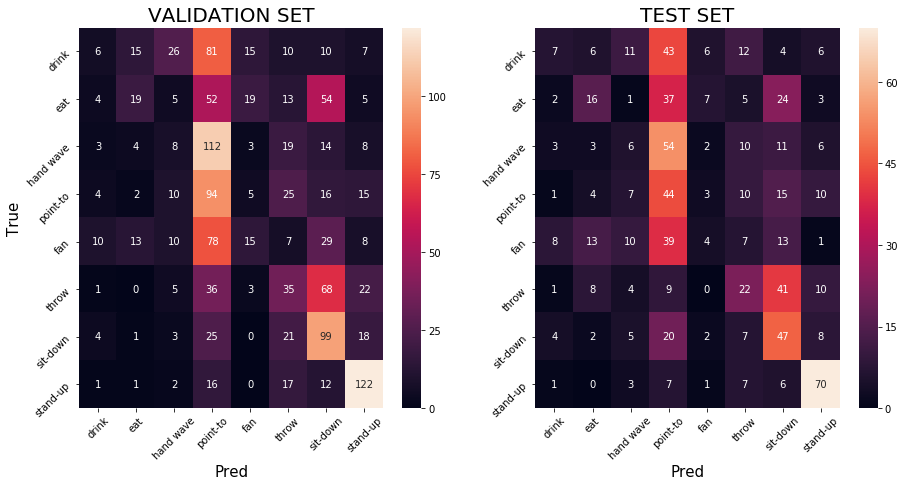

## skipped model keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo-norm.h5 ## 
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame.h5


KeyboardInterrupt: 

In [17]:
from os import scandir
from os.path import basename
from keras.models import load_model
import pickle
import dill
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"
savedModels = [f for f in scandir(SAVED_MODEL_FOLDER) if f.path[-3:] == ".h5"]

## DELETEME
# savedModels = savedModels[0],savedModels[3],savedModels[2]

model_names = ["PoseNet-101","keypoint_rcnn_X_101_32x8d_FPN_3x"]
results = []
for model_to_analyse in model_names:
    datasetName = DATASET_FOLDER+model_to_analyse+"-SPLIT-dataset.pickle"
    print("### Loading dataset: {} ####".format(basename(datasetName)))
    with open(datasetName,'rb') as file_in:
        train_set, val_set, test_set = pickle.load(file_in)
    for saved_model in savedModels:
#         modelName, preprocess_functions, normalise = fromFileNameToParameters(saved_model)
        modelName, normalise = fromFileNameToModel(saved_model)
        if modelName != model_to_analyse:
            print("## skipped model {} ## ".format(saved_model.name))
            continue
        
        print(basename(saved_model))
        ### LOAD accessories
        accessoriesPath = saved_model.path[:-3]+".pickle"
        
        with open(accessoriesPath,"rb") as handle:
            res = pickle.load(handle)
    
        loaded_functions = [dill.loads(x) for x in res["prep_fun_DILL"]]

        one_hot_encoding = loaded_functions[0]
        normaliseBeforePadding = loaded_functions[1]
        paddingTrainValTest = loaded_functions[2]
        preprocessData = loaded_functions[3]
        specificFunction = loaded_functions[4]

        X_train, y_train, X_val, y_val, X_test, y_test = preprocessData(train_set, val_set, test_set, normalise, specificFunction)
#         ## reshaping ###
#         X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 17 * 2) 
#         X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 17 * 2) 
#         X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 17 * 2)
        loadedModel = load_model(SAVED_MODEL_FOLDER+saved_model.name)
        print(basename(saved_model))
        val_acc, test_acc = plotValTestResult(loadedModel, X_val, y_val, X_test, y_test)
        results.append((val_acc, test_acc, saved_model, res["history"]))

In [18]:
savedModels = [f for f in scandir(SAVED_MODEL_FOLDER) if f.path[-3:] == ".h5"]
savedModels[0],savedModels[2],savedModels[3]

(<DirEntry 'keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter.h5'>,
 <DirEntry 'PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5'>,
 <DirEntry 'PoseNet-101-relativeToVideoCenter.h5'>)

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-norm.h5
Val acc: 0.8461538461538461
Test acc: 0.8102766798418972


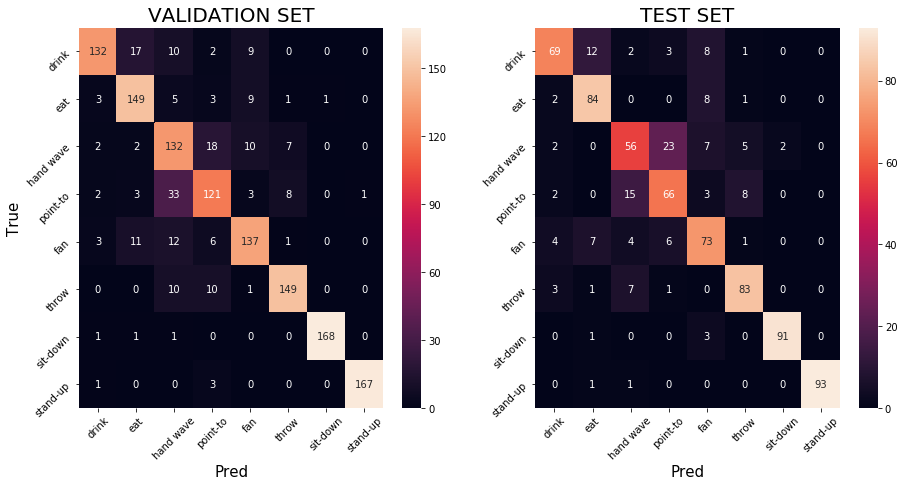

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToFrameCenter-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each frame
Adapting the data to the center of each frame
Adapting the data to the center of each frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToFrameCenter-norm.h5
Val acc: 0.8652014652014652
Test acc: 0.8326745718050066


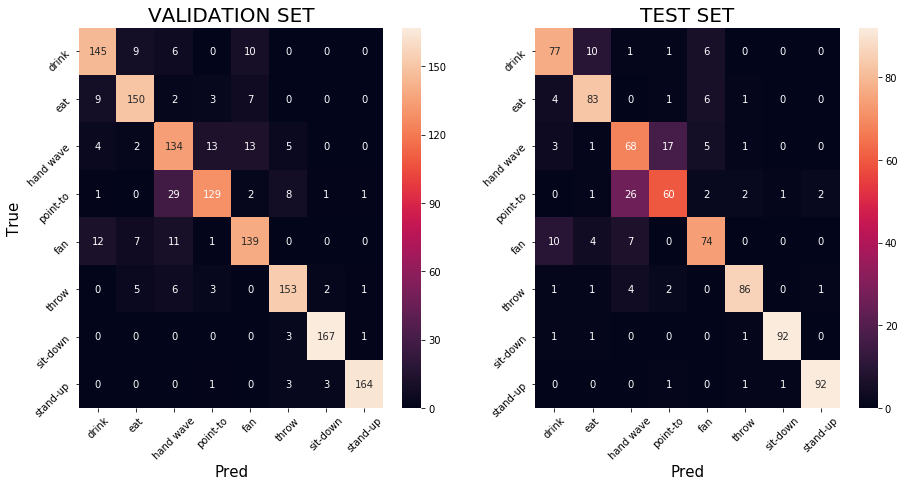

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToFrameCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each frame
Adapting the data to the center of each frame
Adapting the data to the center of each frame
number of zeros train (after padding):		27798672 - 66.55%
number of zeros validation (after padding):	6951708 - 66.57%
number of zeros test (after padding):		3883446 - 66.88%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToFrameCenter.h5
Val acc: 0.8688644688644689
Test acc: 0.839262187088274


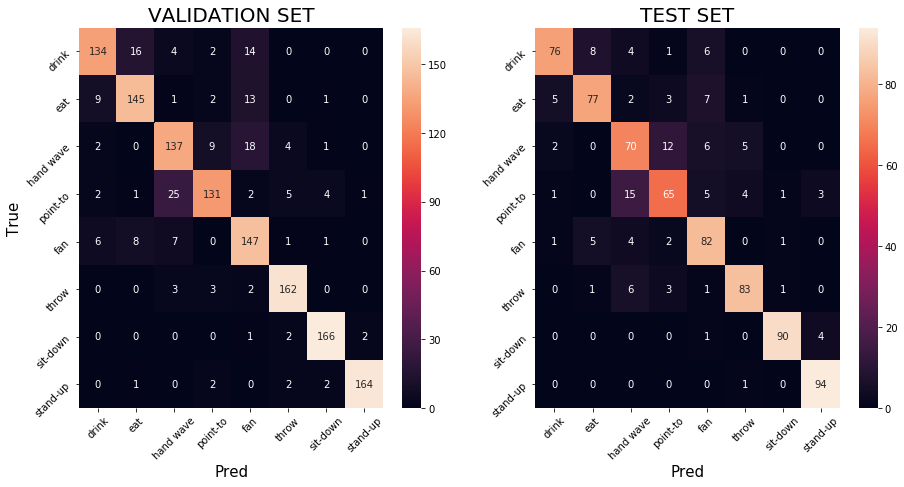

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToNextFrame-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the next frame
Adapting the data to the next frame
Adapting the data to the next frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.71%
number of zeros validation (after padding):	6942018 - 66.78%
number of zeros test (after padding):		3869268 - 66.94%
Dataset train shape:		 (5460, 224, 17, 2)
Dataset validation shape:	 (1365, 224, 17, 2)
Dataset test shape:		 (759, 224, 17, 2)
PoseNet-101-relativeToNextFrame-norm.h5
Val acc: 0.5304029304029304
Test acc: 0.538866930171278


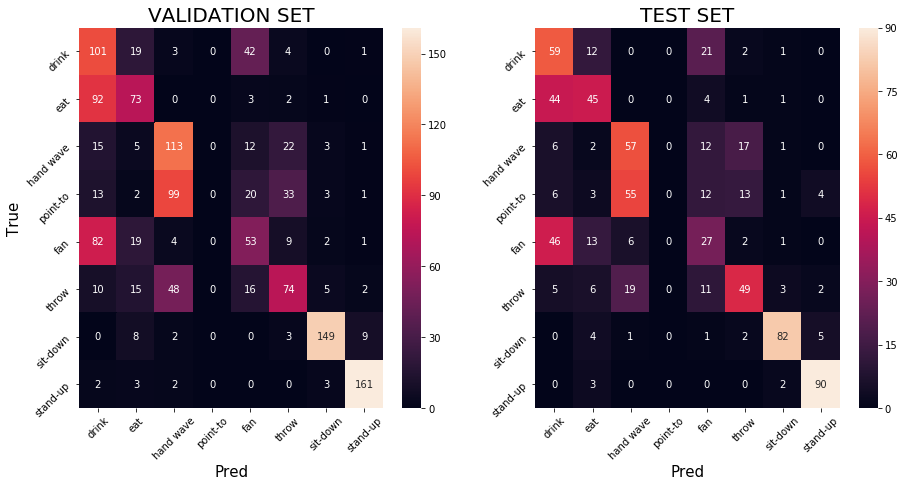

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToNextFrame.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the next frame
Adapting the data to the next frame
Adapting the data to the next frame
number of zeros train (after padding):		27780690 - 66.81%
number of zeros validation (after padding):	6947731 - 66.83%
number of zeros test (after padding):		3879944 - 67.12%
Dataset train shape:		 (5460, 224, 17, 2)
Dataset validation shape:	 (1365, 224, 17, 2)
Dataset test shape:		 (759, 224, 17, 2)
PoseNet-101-relativeToNextFrame.h5
Val acc: 0.7091575091575092
Test acc: 0.6837944664031621


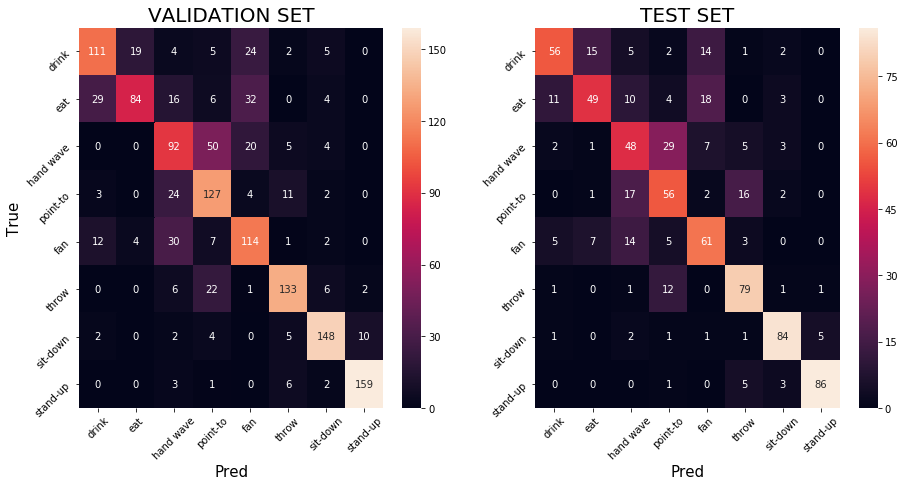

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame-norm.h5
Val acc: 0.8754578754578755
Test acc: 0.8537549407114624


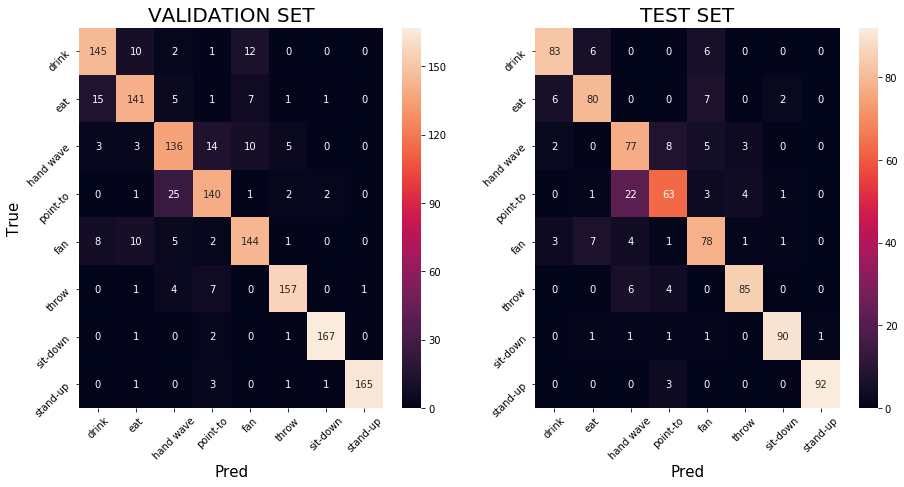

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
number of zeros train (after padding):		27798672 - 66.55%
number of zeros validation (after padding):	6951708 - 66.57%
number of zeros test (after padding):		3883446 - 66.88%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame.h5
Val acc: 0.8652014652014652
Test acc: 0.8326745718050066


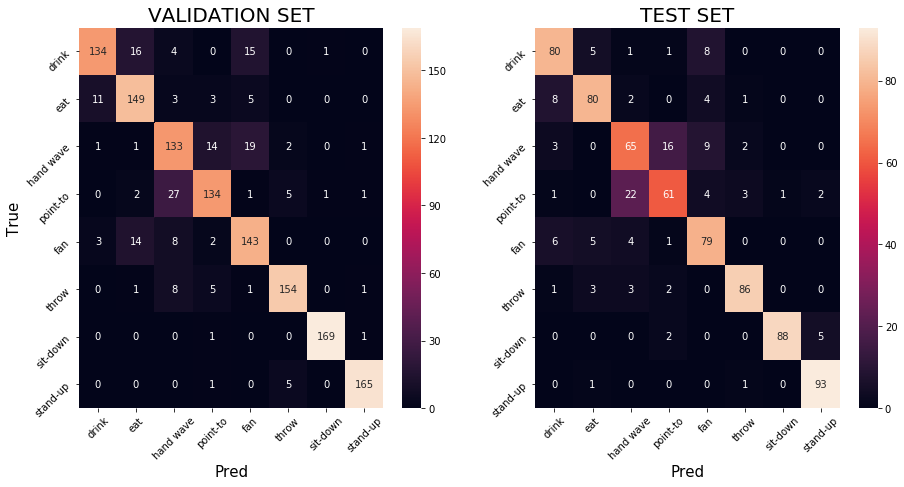

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo-norm.h5
Val acc: 0.8813186813186813
Test acc: 0.8669301712779973


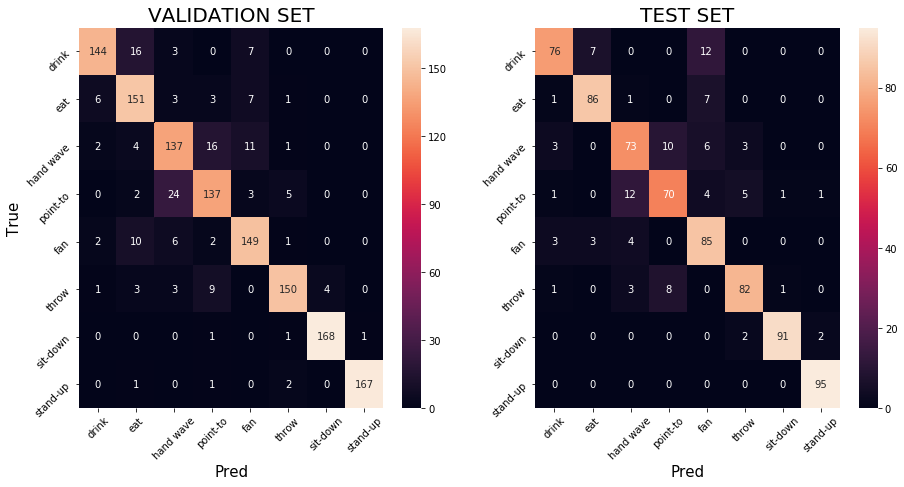

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5
Val acc: 0.8695970695970696
Test acc: 0.8735177865612648


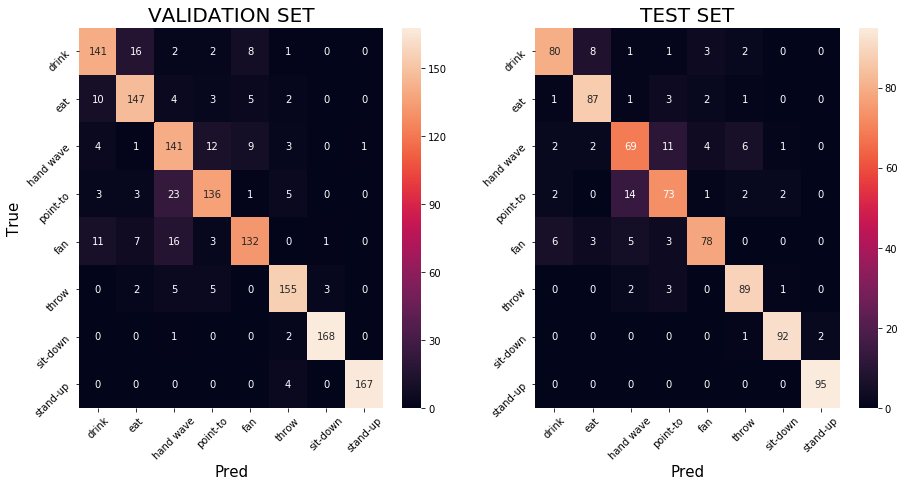

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToVideoCenter-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToVideoCenter-norm.h5
Val acc: 0.8923076923076924
Test acc: 0.8669301712779973


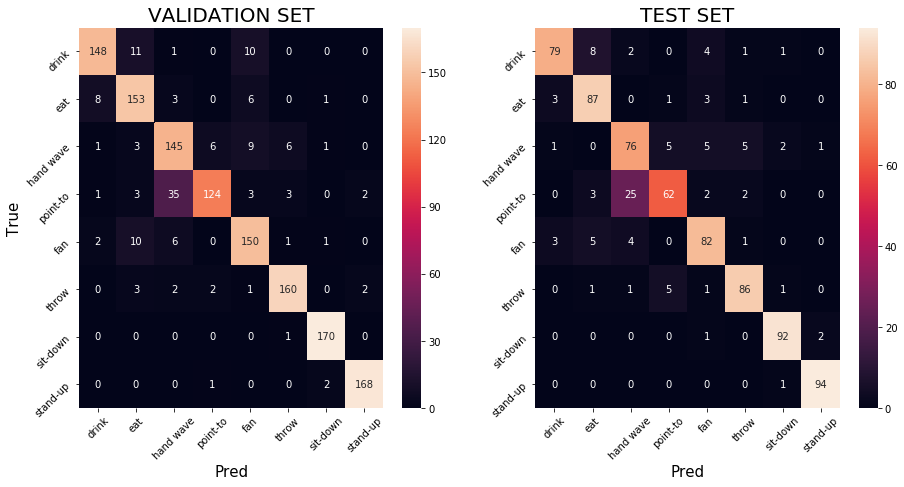

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToVideoCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToVideoCenter.h5
Val acc: 0.873992673992674
Test acc: 0.8432147562582345


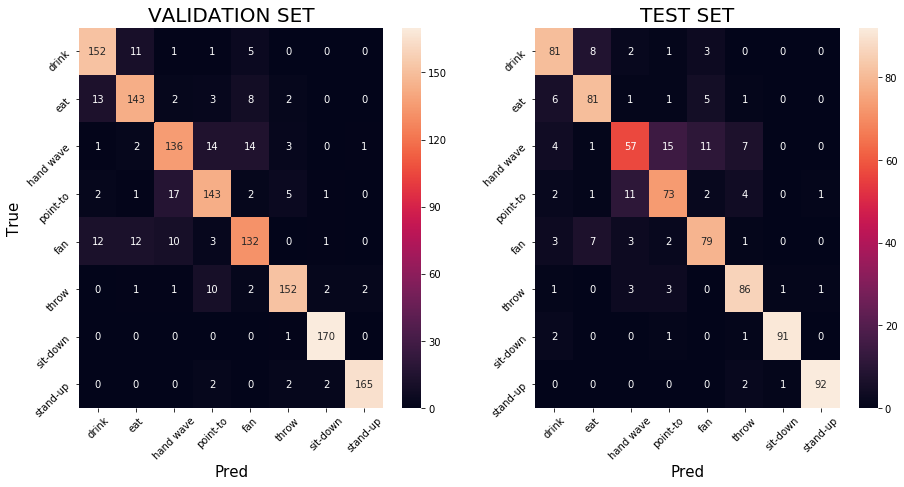

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
number of zeros train (after padding):		27798672 - 66.55%
number of zeros validation (after padding):	6951708 - 66.57%
number of zeros test (after padding):		3883446 - 66.88%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101.h5
Val acc: 0.27765567765567767
Test acc: 0.2450592885375494


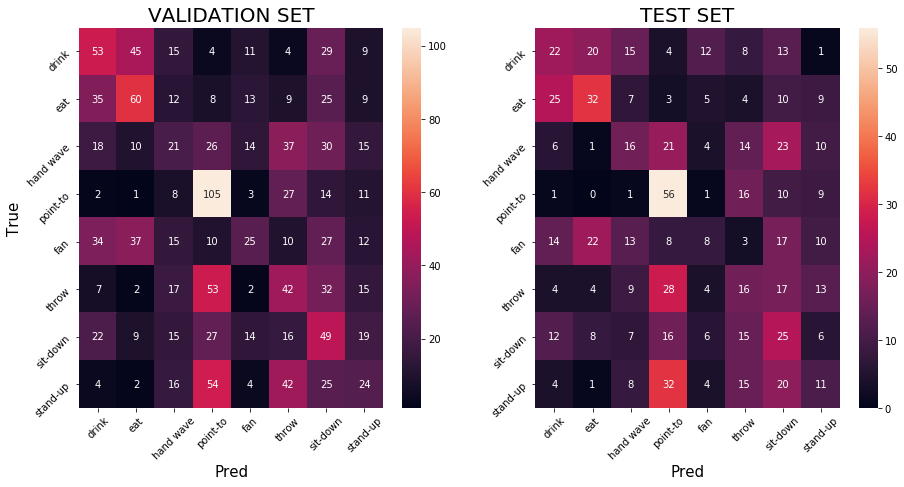

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-norm.h5
Val acc: 0.9032967032967033
Test acc: 0.8774703557312253


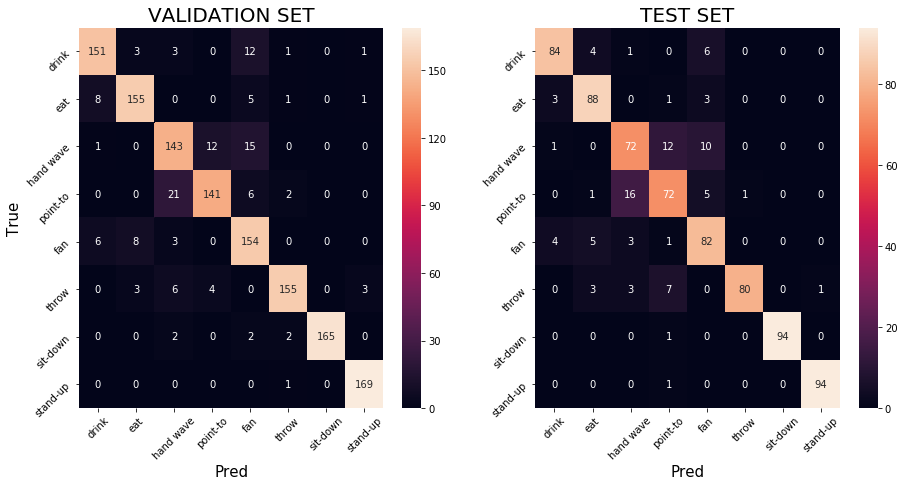

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each frame
Adapting the data to the center of each frame
Adapting the data to the center of each frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter-norm.h5
Val acc: 0.9062271062271062
Test acc: 0.8880105401844532


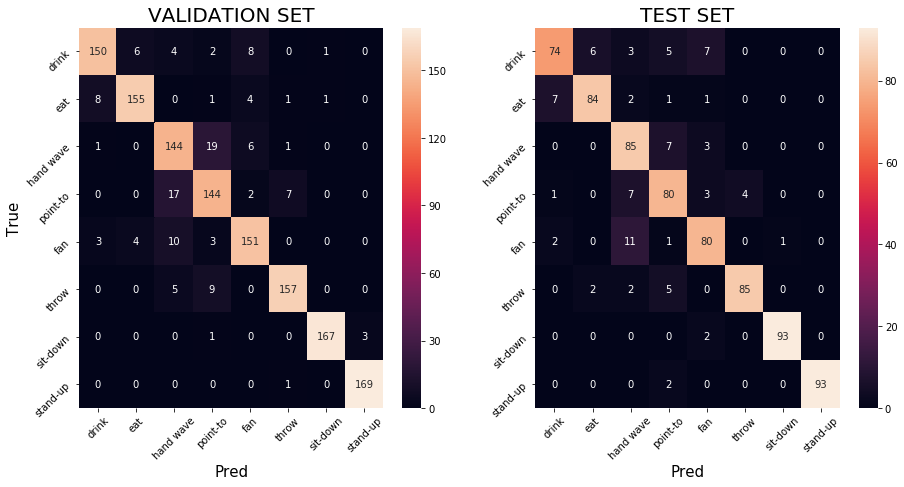

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each frame
Adapting the data to the center of each frame
Adapting the data to the center of each frame
number of zeros train (after padding):		27786981 - 66.53%
number of zeros validation (after padding):	6933558 - 66.40%
number of zeros test (after padding):		3833123 - 66.02%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter.h5
Val acc: 0.9018315018315018
Test acc: 0.8761528326745718


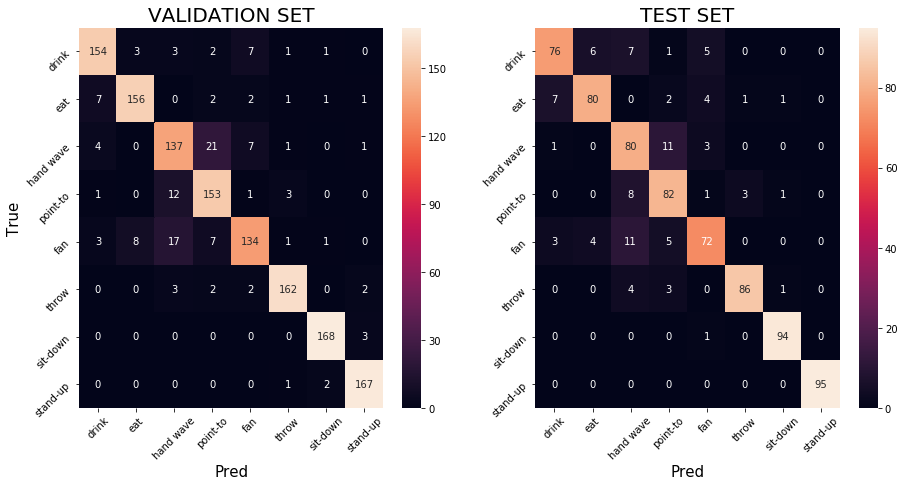

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the next frame
Adapting the data to the next frame
Adapting the data to the next frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.82%
number of zeros validation (after padding):	6932940 - 66.69%
number of zeros test (after padding):		3832786 - 66.30%
Dataset train shape:		 (5460, 224, 17, 2)
Dataset validation shape:	 (1365, 224, 17, 2)
Dataset test shape:		 (759, 224, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame-norm.h5
Val acc: 0.915018315018315
Test acc: 0.9169960474308301


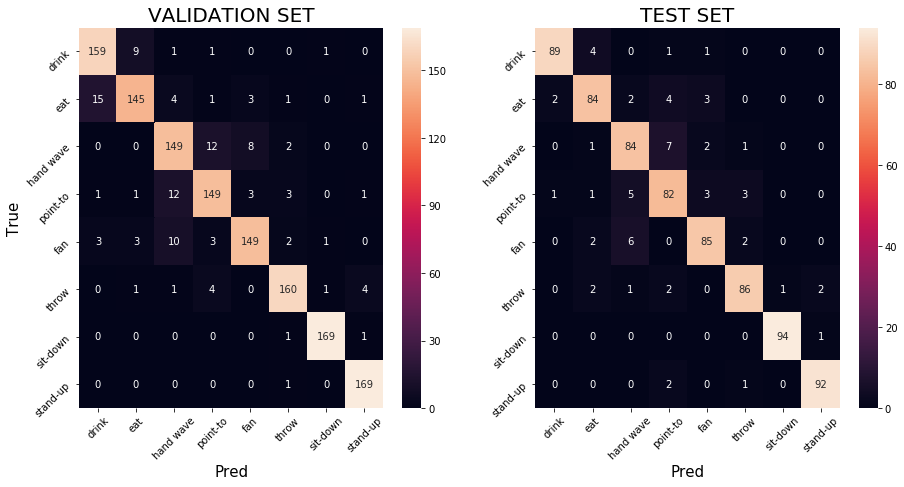

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the next frame
Adapting the data to the next frame
Adapting the data to the next frame
number of zeros train (after padding):		27784916 - 66.82%
number of zeros validation (after padding):	6933054 - 66.69%
number of zeros test (after padding):		3832848 - 66.31%
Dataset train shape:		 (5460, 224, 17, 2)
Dataset validation shape:	 (1365, 224, 17, 2)
Dataset test shape:		 (759, 224, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame.h5
Val acc: 0.863003663003663
Test acc: 0.8682476943346509


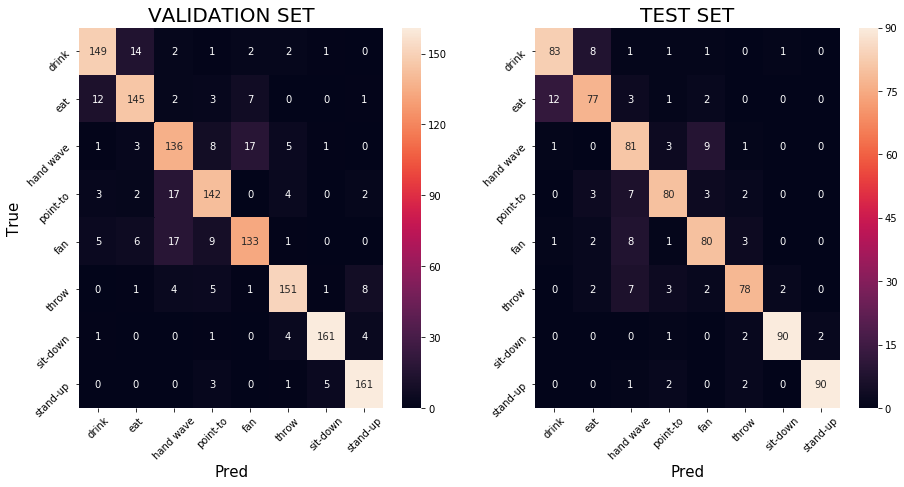

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfFrame-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfFrame-norm.h5
Val acc: 0.9106227106227106
Test acc: 0.897233201

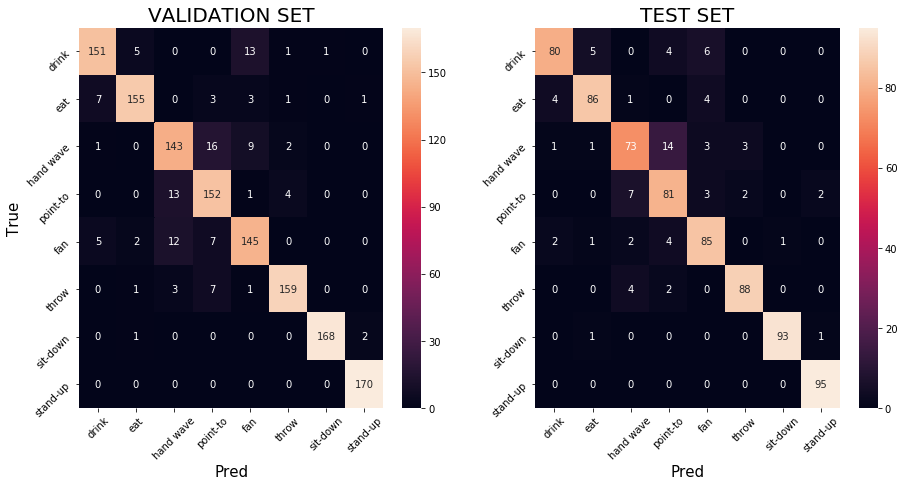

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfFrame.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
number of zeros train (after padding):		27816472 - 66.60%
number of zeros validation (after padding):	6941034 - 66.47%
number of zeros test (after padding):		3837237 - 66.09%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfFrame.h5
Val acc: 0.8879120879120879
Test acc: 0.8945981554677207


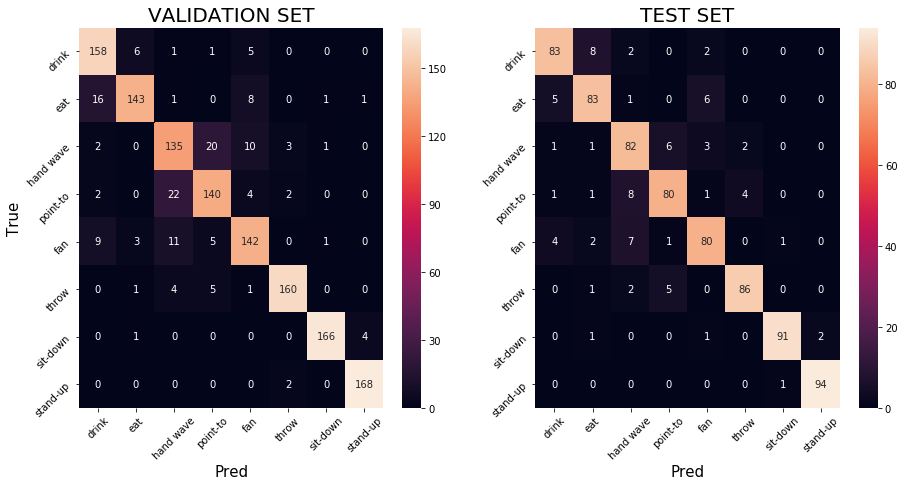

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo-norm.h5
Val acc: 0.9128205128205128
Test acc: 0.905138339

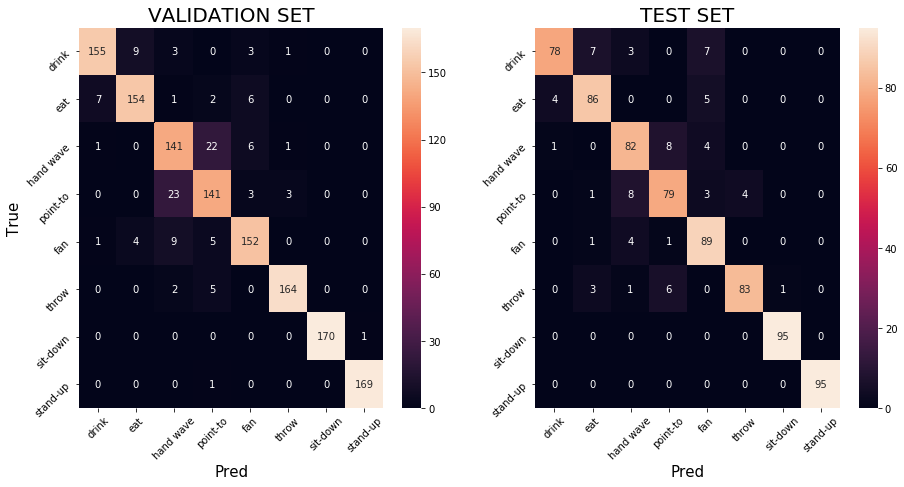

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
number of zeros train (after padding):		27784428 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832793 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo.h5
Val acc: 0.8974358974358975
Test acc: 0.8814229249011858


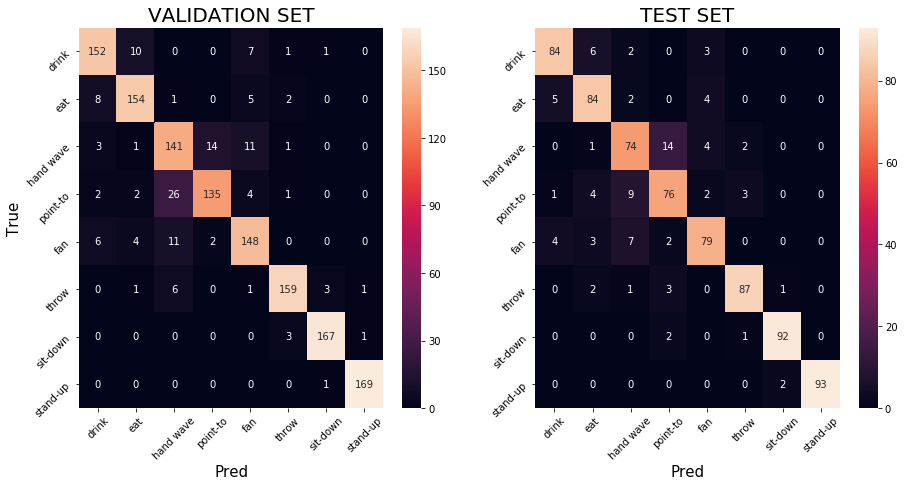

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter-norm.h5
Val acc: 0.9157509157509157
Test acc: 0.8985507246376812


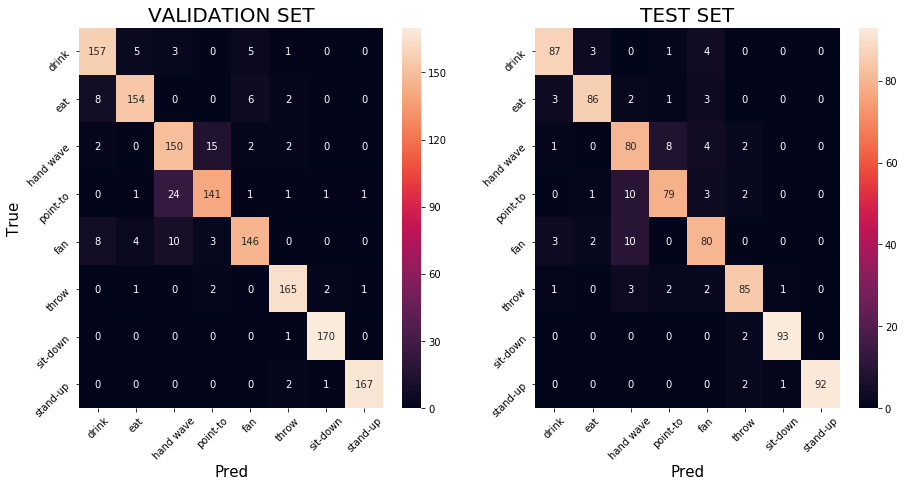

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
number of zeros train (after padding):		27784433 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter.h5
Val acc: 0.9091575091575091
Test acc: 0.8880105401844532


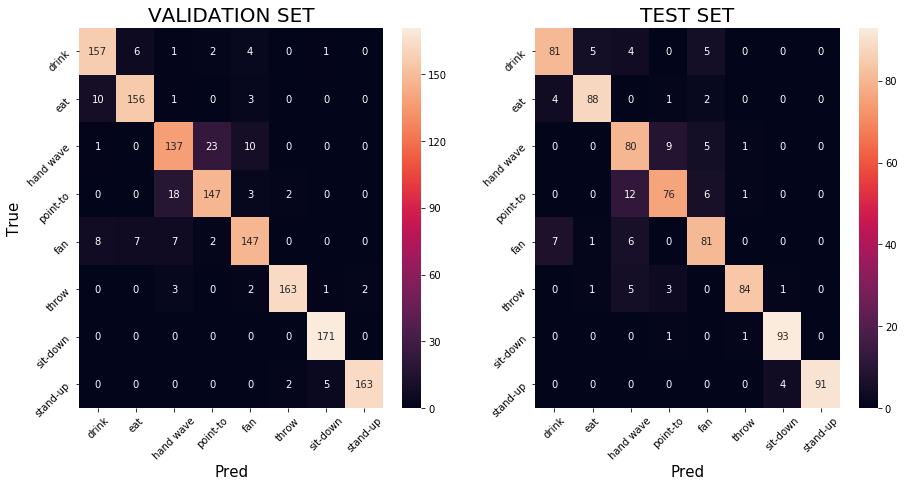

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x.h5
Val acc: 0.273992673992674
Test acc: 0.2635046113306983


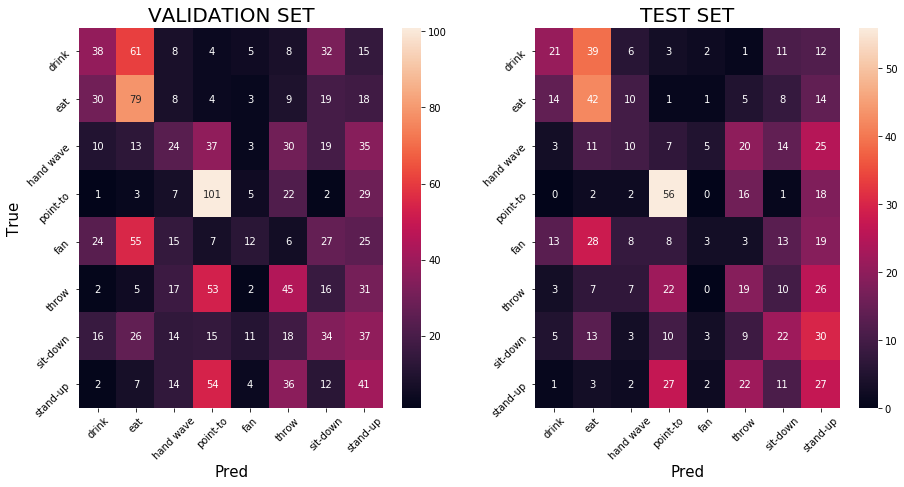

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-norm.h5
Val acc: 0.8461538461538461
Test acc: 0.8102766798418972


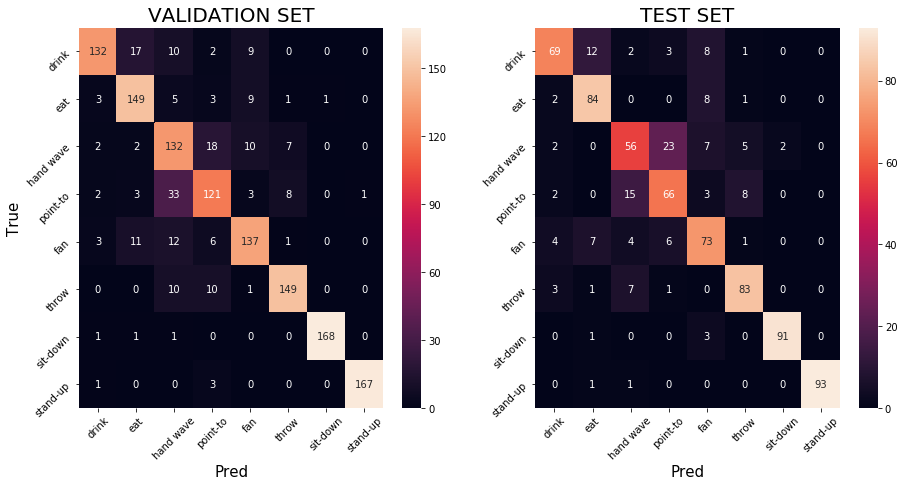

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToFrameCenter-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each frame
Adapting the data to the center of each frame
Adapting the data to the center of each frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToFrameCenter-norm.h5
Val acc: 0.8652014652014652
Test acc: 0.8326745718050066


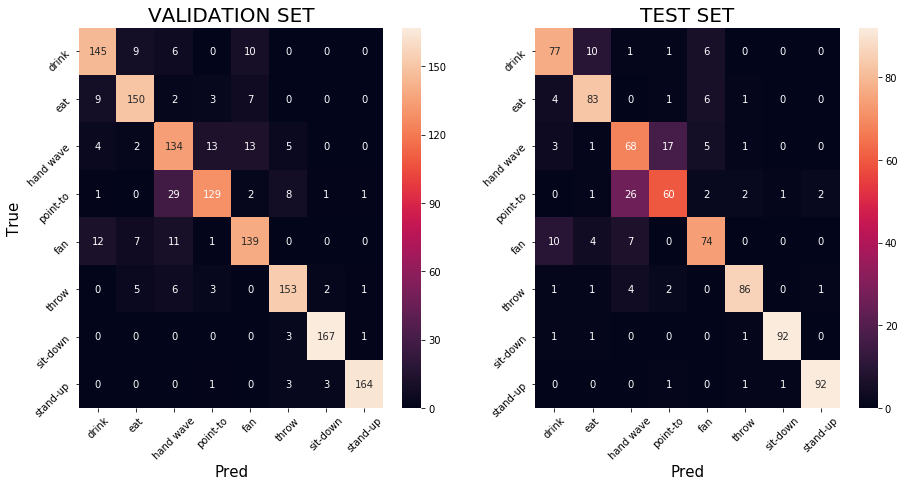

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToFrameCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each frame
Adapting the data to the center of each frame
Adapting the data to the center of each frame
number of zeros train (after padding):		27798672 - 66.55%
number of zeros validation (after padding):	6951708 - 66.57%
number of zeros test (after padding):		3883446 - 66.88%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToFrameCenter.h5
Val acc: 0.8688644688644689
Test acc: 0.839262187088274


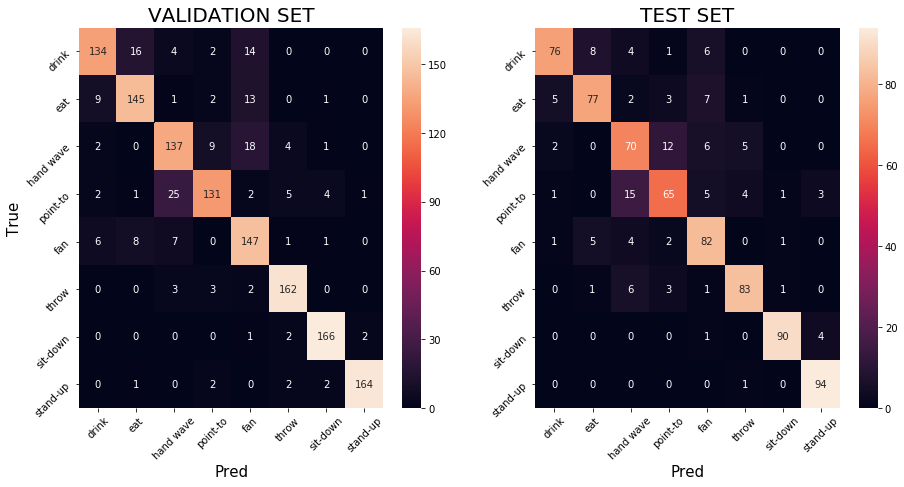

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToNextFrame-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the next frame
Adapting the data to the next frame
Adapting the data to the next frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.71%
number of zeros validation (after padding):	6942018 - 66.78%
number of zeros test (after padding):		3869268 - 66.94%
Dataset train shape:		 (5460, 224, 17, 2)
Dataset validation shape:	 (1365, 224, 17, 2)
Dataset test shape:		 (759, 224, 17, 2)
PoseNet-101-relativeToNextFrame-norm.h5
Val acc: 0.5304029304029304
Test acc: 0.538866930171278


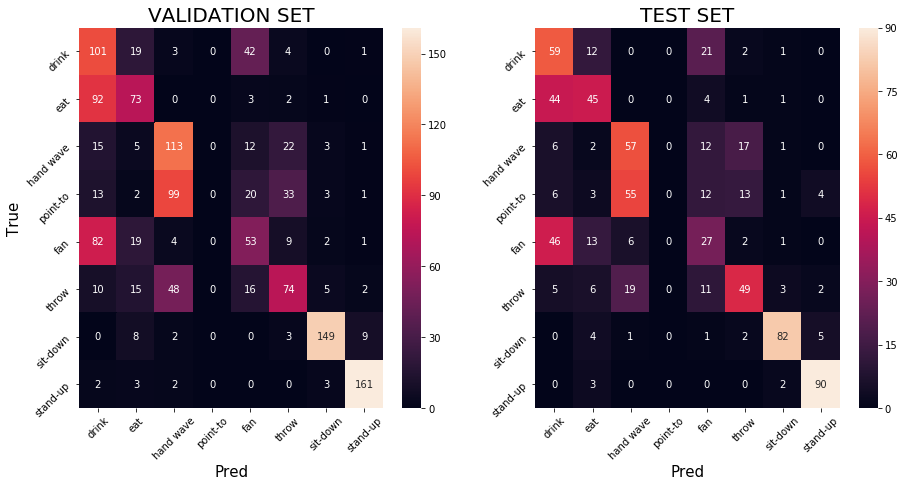

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToNextFrame.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the next frame
Adapting the data to the next frame
Adapting the data to the next frame
number of zeros train (after padding):		27780690 - 66.81%
number of zeros validation (after padding):	6947731 - 66.83%
number of zeros test (after padding):		3879944 - 67.12%
Dataset train shape:		 (5460, 224, 17, 2)
Dataset validation shape:	 (1365, 224, 17, 2)
Dataset test shape:		 (759, 224, 17, 2)
PoseNet-101-relativeToNextFrame.h5
Val acc: 0.7091575091575092
Test acc: 0.6837944664031621


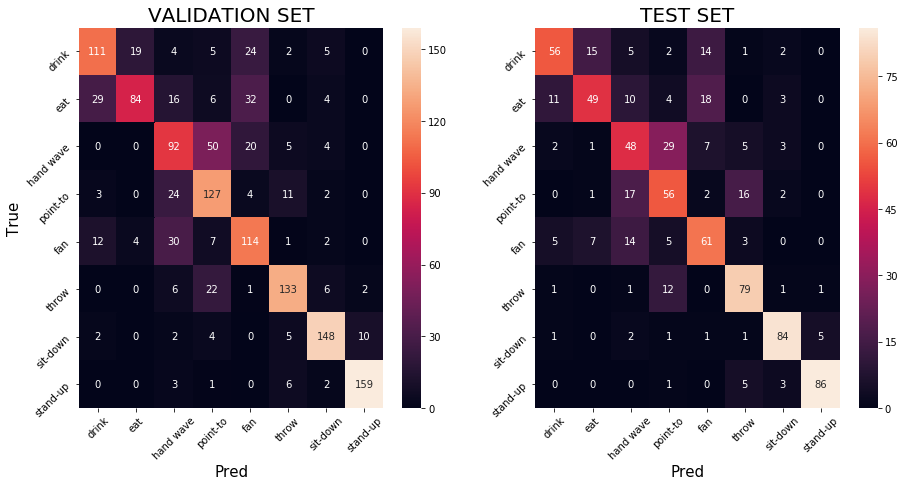

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame-norm.h5
Val acc: 0.8754578754578755
Test acc: 0.8537549407114624


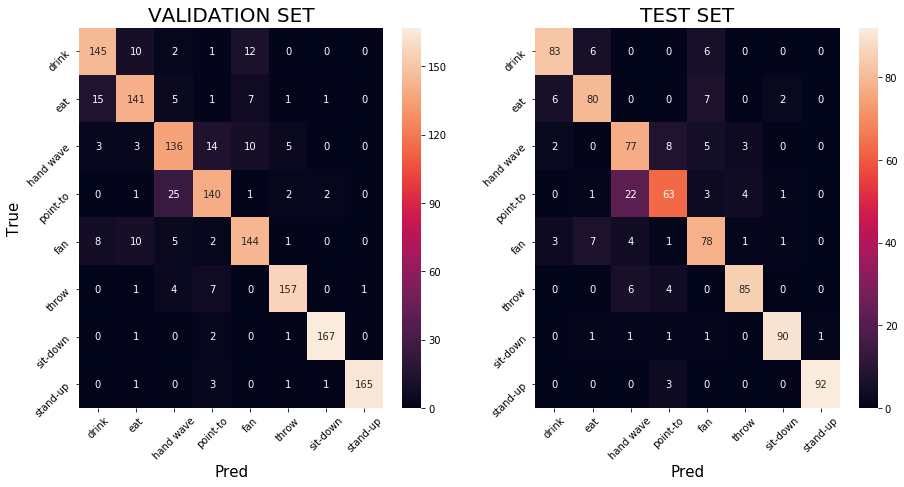

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
number of zeros train (after padding):		27798672 - 66.55%
number of zeros validation (after padding):	6951708 - 66.57%
number of zeros test (after padding):		3883446 - 66.88%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame.h5
Val acc: 0.8652014652014652
Test acc: 0.8326745718050066


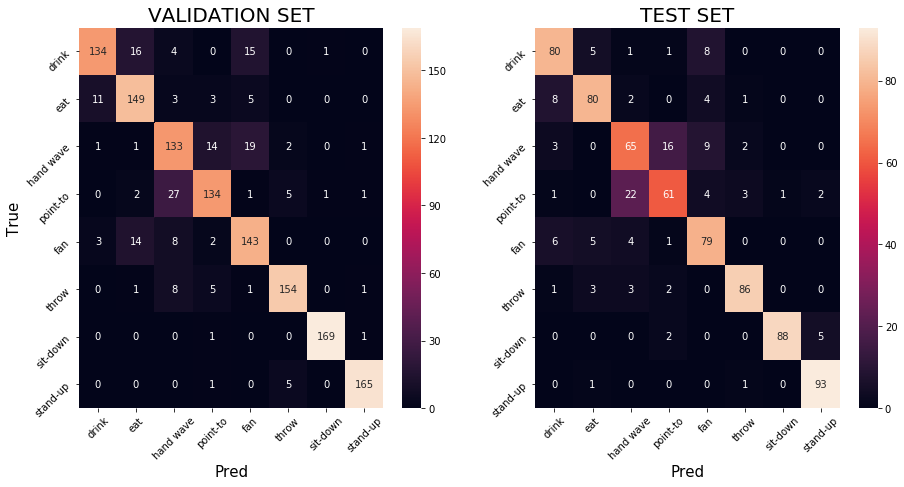

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo-norm.h5
Val acc: 0.8813186813186813
Test acc: 0.8669301712779973


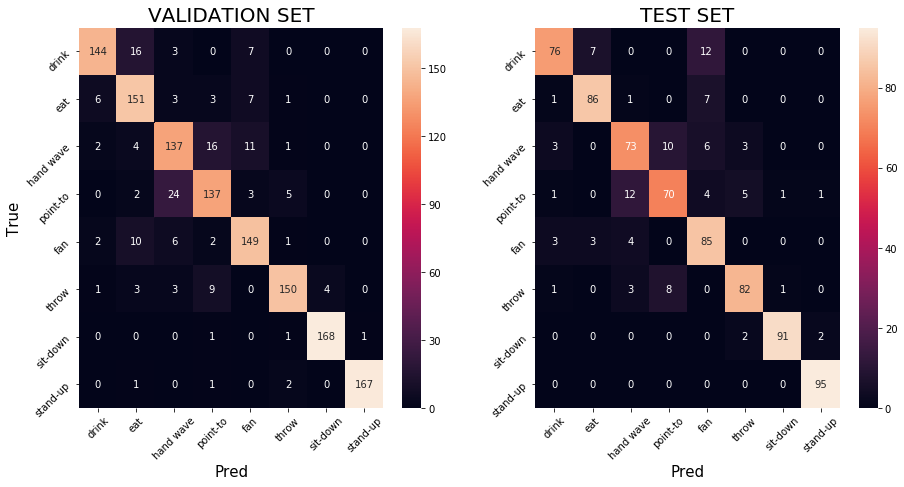

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5
Val acc: 0.8695970695970696
Test acc: 0.8735177865612648


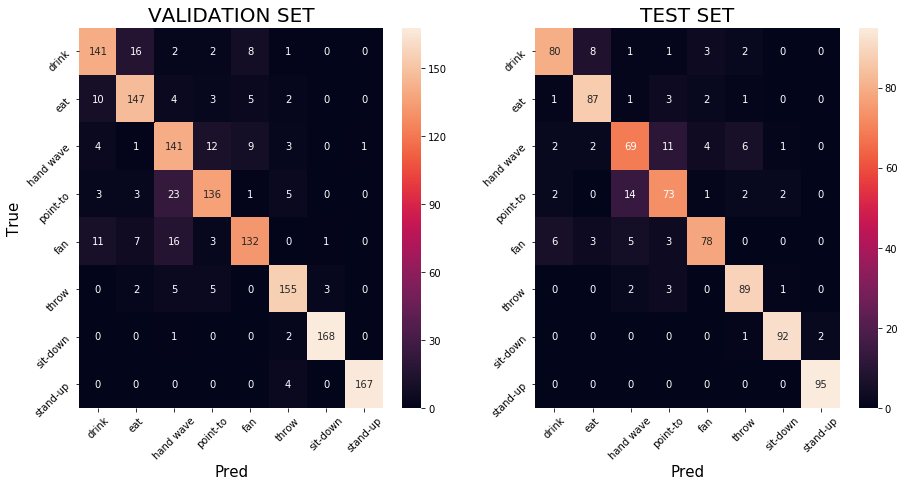

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToVideoCenter-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToVideoCenter-norm.h5
Val acc: 0.8923076923076924
Test acc: 0.8669301712779973


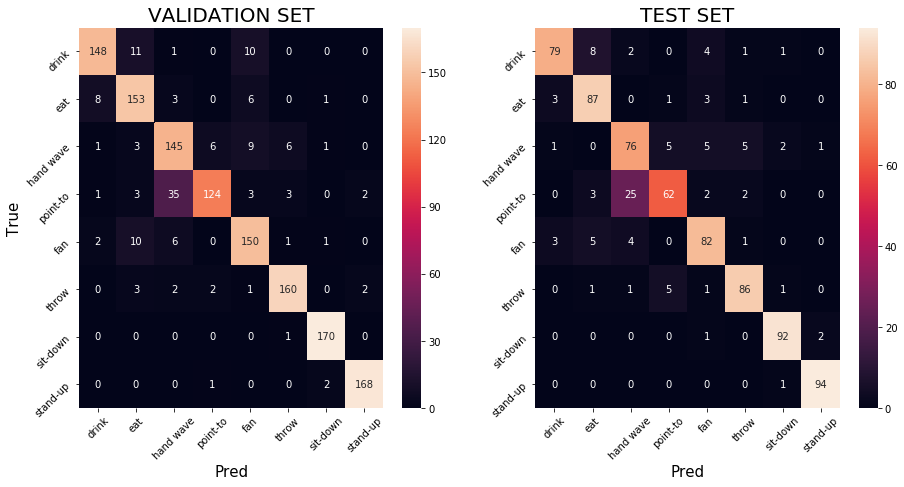

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101-relativeToVideoCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToVideoCenter.h5
Val acc: 0.873992673992674
Test acc: 0.8432147562582345


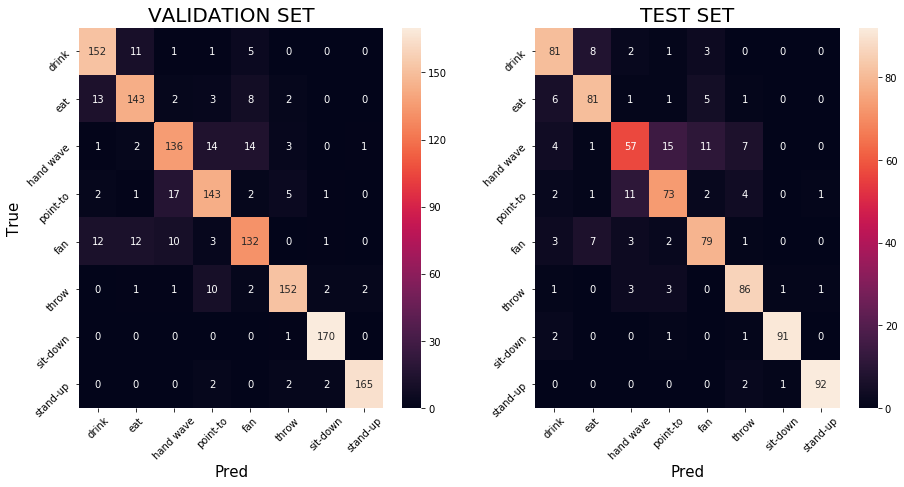

### Loading dataset: PoseNet-101-SPLIT-dataset.pickle ####
PoseNet-101.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
number of zeros train (after padding):		27798672 - 66.55%
number of zeros validation (after padding):	6951708 - 66.57%
number of zeros test (after padding):		3883446 - 66.88%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101.h5
Val acc: 0.27765567765567767
Test acc: 0.2450592885375494


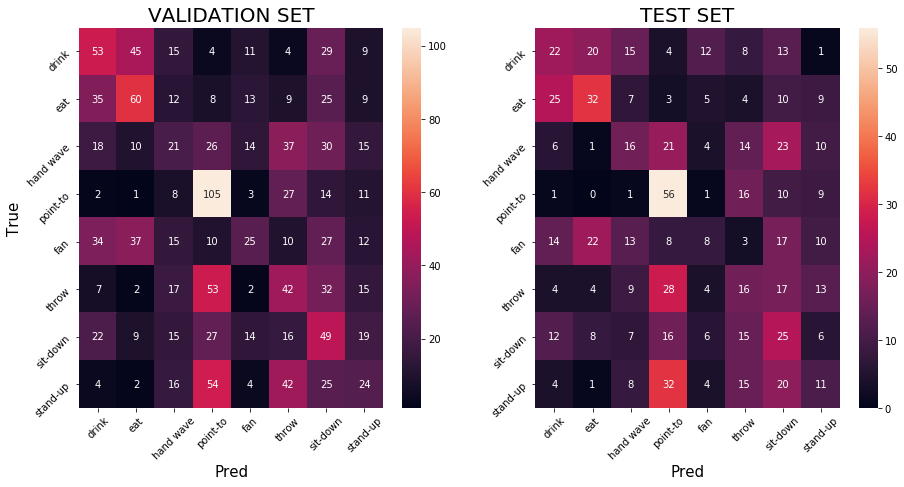

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-norm.h5
Val acc: 0.9032967032967033
Test acc: 0.8774703557312253


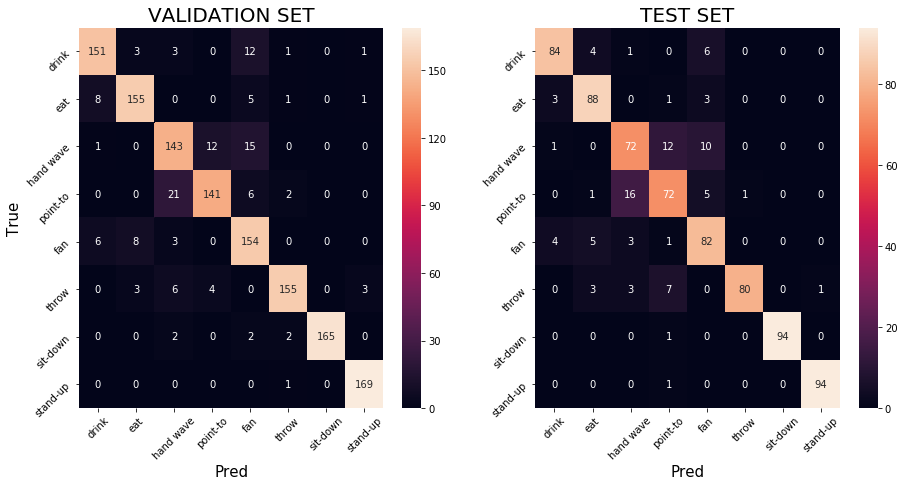

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each frame
Adapting the data to the center of each frame
Adapting the data to the center of each frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter-norm.h5
Val acc: 0.9062271062271062
Test acc: 0.8880105401844532


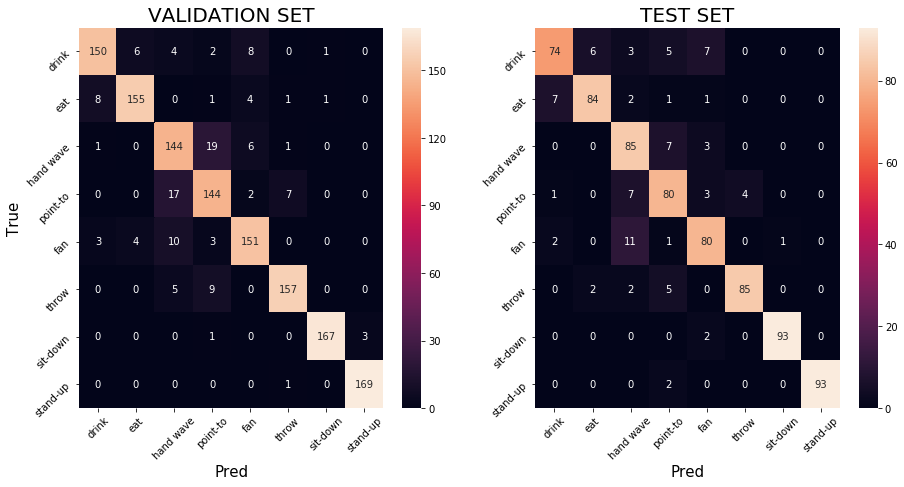

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each frame
Adapting the data to the center of each frame
Adapting the data to the center of each frame
number of zeros train (after padding):		27786981 - 66.53%
number of zeros validation (after padding):	6933558 - 66.40%
number of zeros test (after padding):		3833123 - 66.02%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter.h5
Val acc: 0.9018315018315018
Test acc: 0.8761528326745718


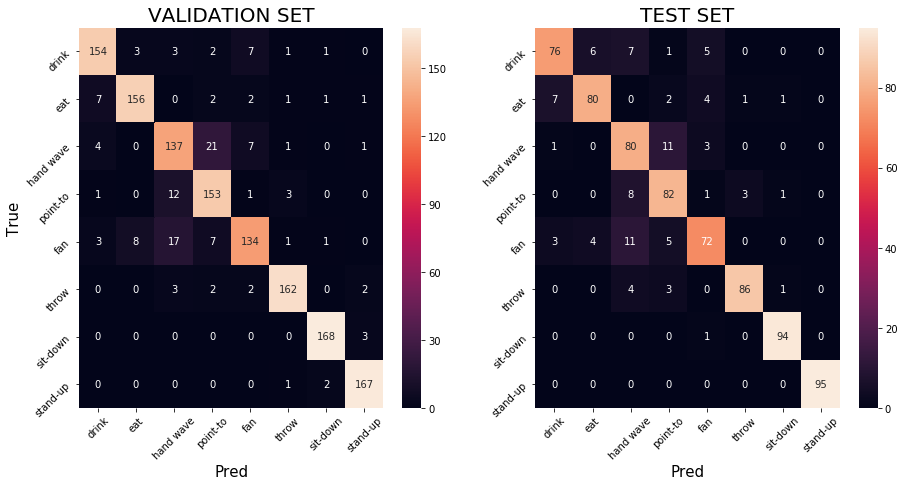

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the next frame
Adapting the data to the next frame
Adapting the data to the next frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.82%
number of zeros validation (after padding):	6932940 - 66.69%
number of zeros test (after padding):		3832786 - 66.30%
Dataset train shape:		 (5460, 224, 17, 2)
Dataset validation shape:	 (1365, 224, 17, 2)
Dataset test shape:		 (759, 224, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame-norm.h5
Val acc: 0.915018315018315
Test acc: 0.9169960474308301


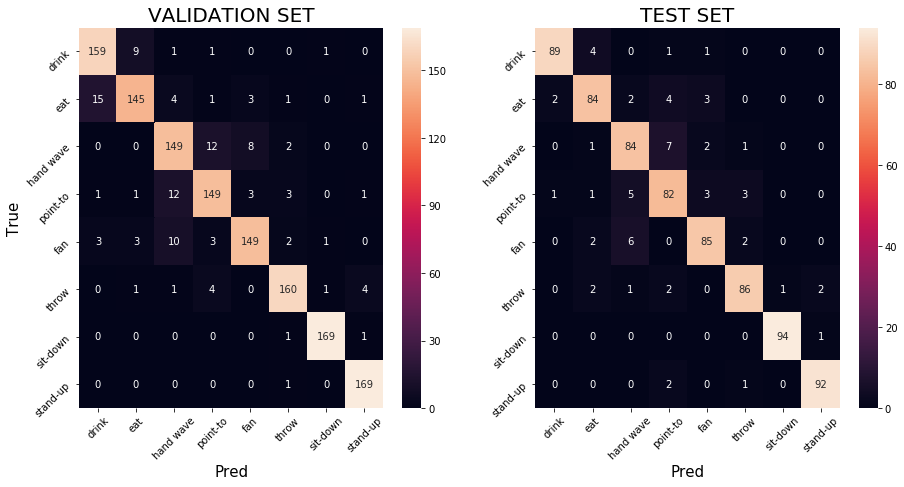

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the next frame
Adapting the data to the next frame
Adapting the data to the next frame
number of zeros train (after padding):		27784916 - 66.82%
number of zeros validation (after padding):	6933054 - 66.69%
number of zeros test (after padding):		3832848 - 66.31%
Dataset train shape:		 (5460, 224, 17, 2)
Dataset validation shape:	 (1365, 224, 17, 2)
Dataset test shape:		 (759, 224, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame.h5
Val acc: 0.863003663003663
Test acc: 0.8682476943346509


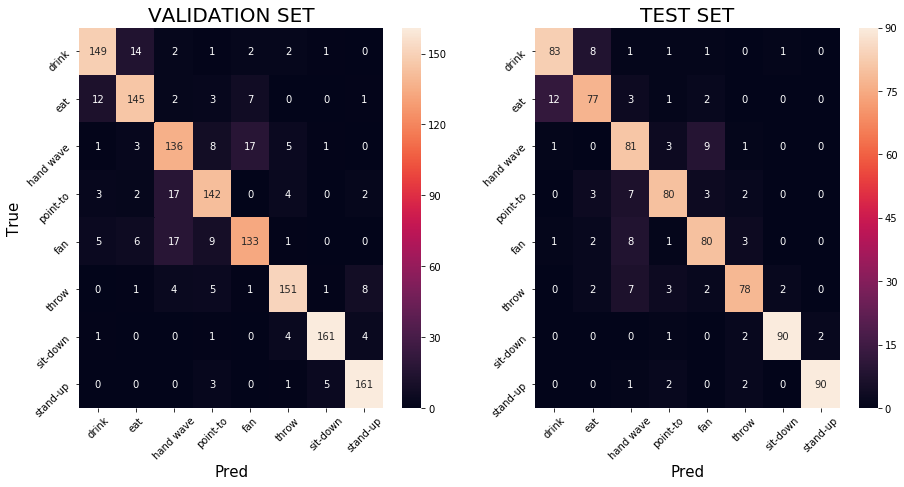

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfFrame-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfFrame-norm.h5
Val acc: 0.9106227106227106
Test acc: 0.897233201

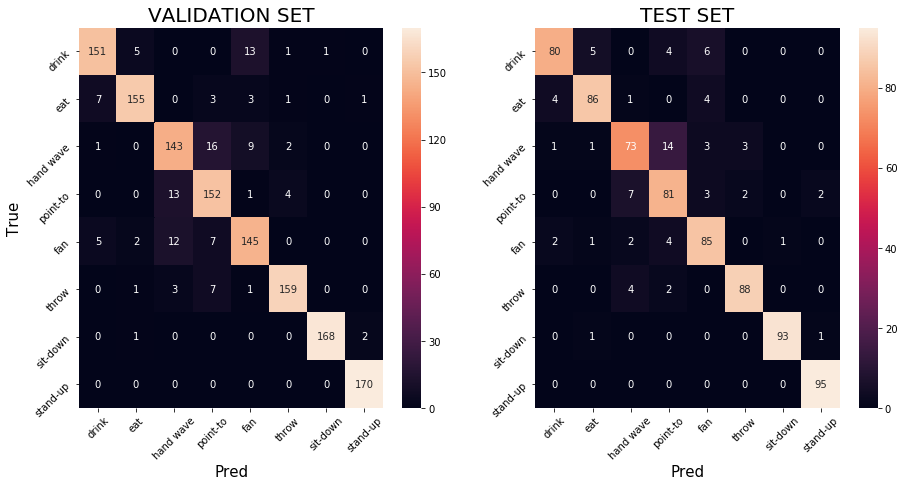

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfFrame.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
Adapting the data to the TOP-MIDDLE-BOTTOM center of each frame
number of zeros train (after padding):		27816472 - 66.60%
number of zeros validation (after padding):	6941034 - 66.47%
number of zeros test (after padding):		3837237 - 66.09%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfFrame.h5
Val acc: 0.8879120879120879
Test acc: 0.8945981554677207


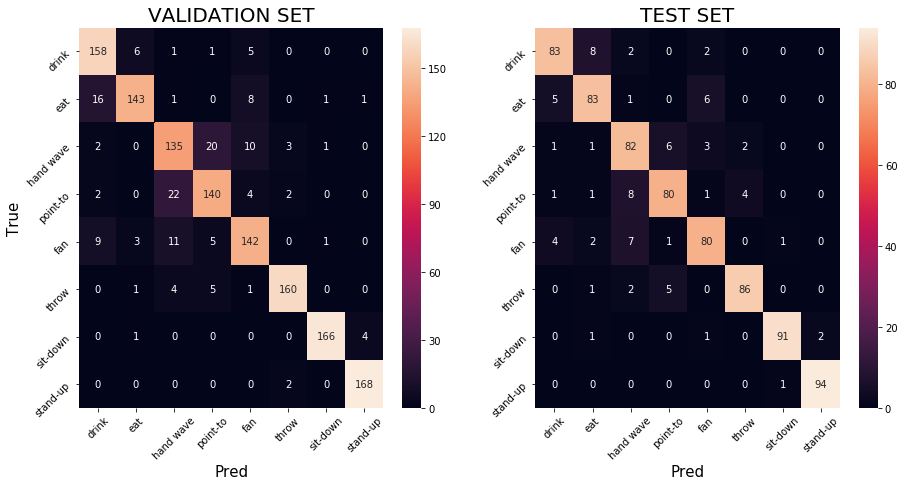

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo-norm.h5
Val acc: 0.9128205128205128
Test acc: 0.905138339

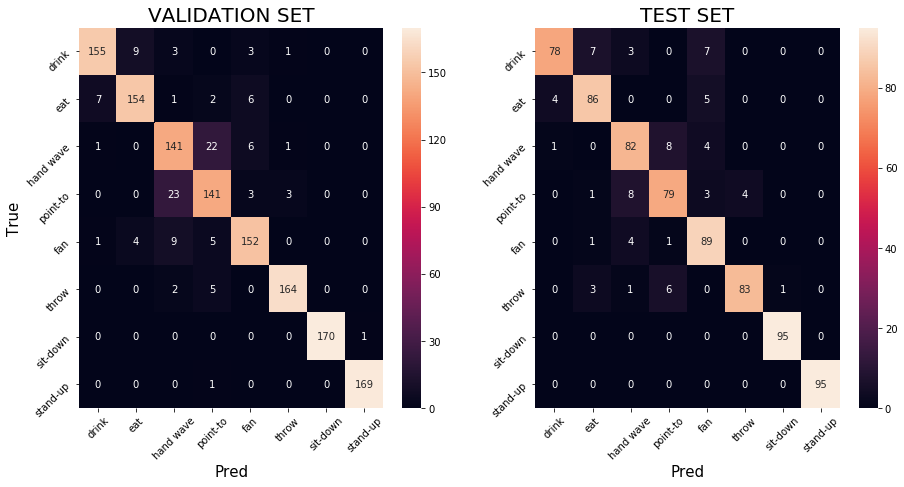

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
Adapting the data to the TOP-MIDDLE-BOTTOM center of each video
number of zeros train (after padding):		27784428 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832793 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToUpperMiddleBottomCentersOfVideo.h5
Val acc: 0.8974358974358975
Test acc: 0.8814229249011858


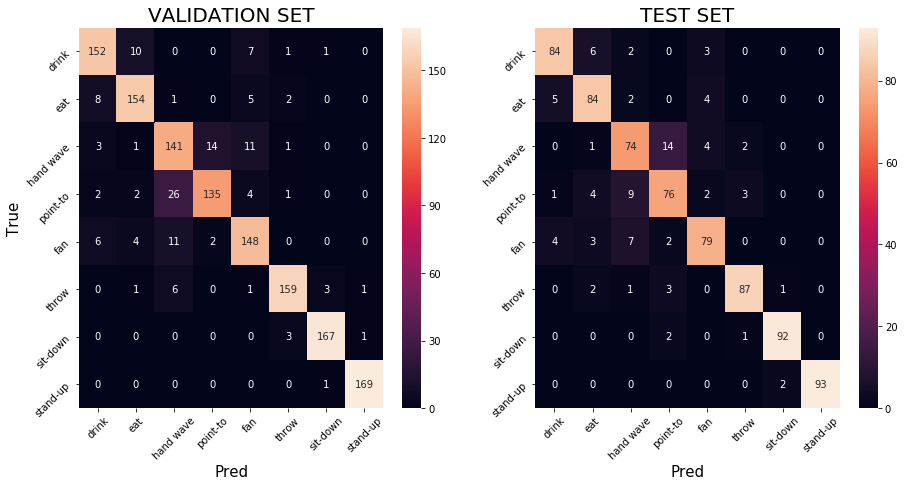

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter-norm.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter-norm.h5
Val acc: 0.9157509157509157
Test acc: 0.8985507246376812


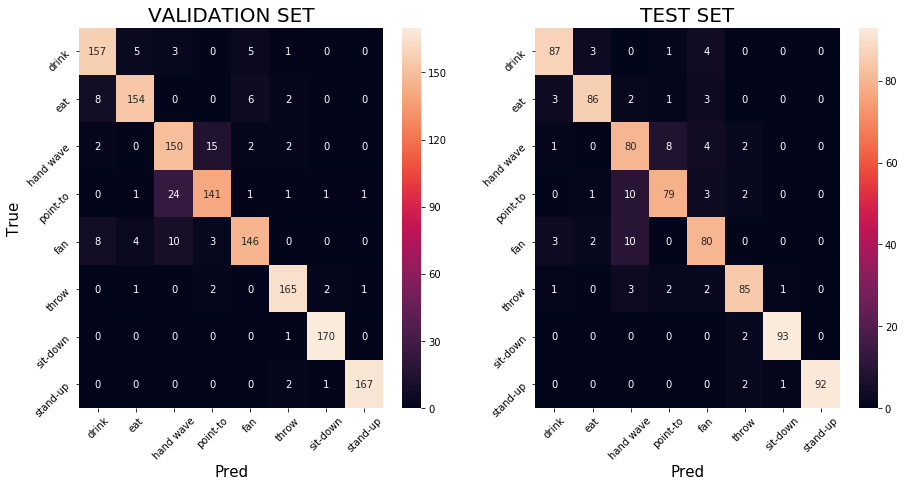

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
number of zeros train (after padding):		27784433 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToVideoCenter.h5
Val acc: 0.9091575091575091
Test acc: 0.8880105401844532


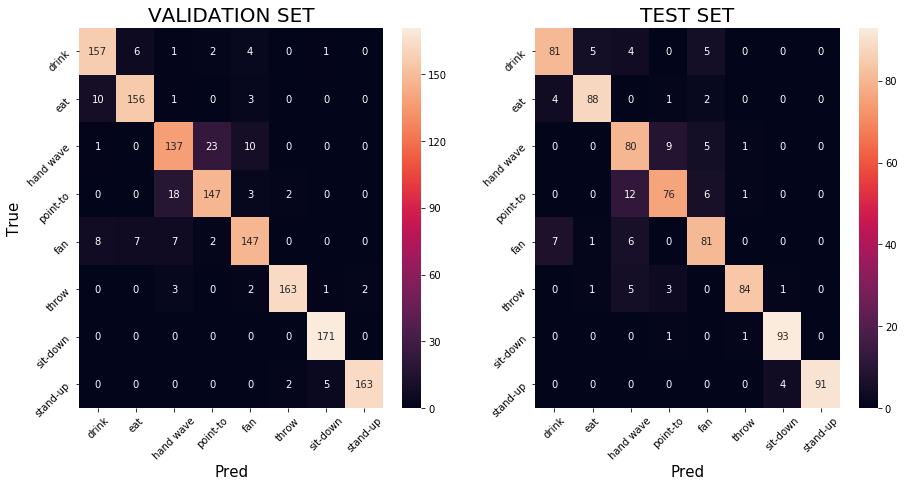

### Loading dataset: keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle ####
keypoint_rcnn_X_101_32x8d_FPN_3x.h5
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
number of zeros train (after padding):		27784426 - 66.52%
number of zeros validation (after padding):	6932940 - 66.39%
number of zeros test (after padding):		3832786 - 66.01%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
keypoint_rcnn_X_101_32x8d_FPN_3x.h5
Val acc: 0.273992673992674
Test acc: 0.2635046113306983


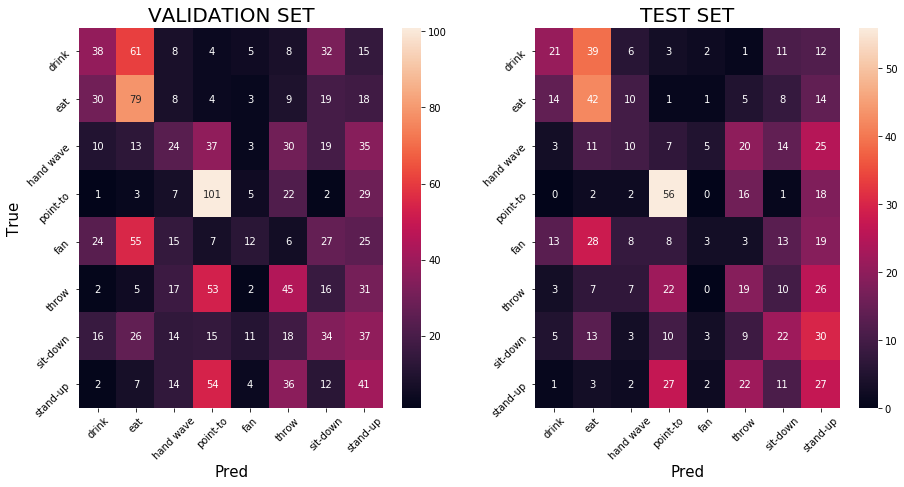

In [8]:
from os import scandir
from os.path import basename
from keras.models import load_model
import pickle
import dill
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"
savedModels = [f for f in scandir(SAVED_MODEL_FOLDER) if f.path[-3:] == ".h5"]
savedModels.sort(key=lambda x : x.name)

## DELETEME
# savedModels = savedModels[0],savedModels[2],savedModels[3]

model_names = ["PoseNet-101","keypoint_rcnn_X_101_32x8d_FPN_3x"]
results = []
# for model_to_analyse in model_names:
#     datasetName = DATASET_FOLDER+model_to_analyse+"-SPLIT-dataset.pickle"
#     print("### Loading dataset: {} ####".format(basename(datasetName)))
#     with open(datasetName,'rb') as file_in:
#         train_set2, val_set2, test_set2 = pickle.load(file_in)
for saved_model in savedModels:
    modelName, normalise = fromFileNameToModel(saved_model)
    datasetName = DATASET_FOLDER+modelName+"-SPLIT-dataset.pickle"
    print("### Loading dataset: {} ####".format(basename(datasetName)))
    with open(datasetName,'rb') as file_in:
        train_set, val_set, test_set = pickle.load(file_in)
#         modelName, preprocess_functions, normalise = fromFileNameToParameters(saved_model)

#         if modelName != model_to_analyse:
#             print("## skipped model {} ## ".format(saved_model.name))
#             continue
#         train_set_copy, val_set_copy, test_set_copy =  list(train_set2), list(val_set2), list(test_set2)

    print(basename(saved_model))
    ### LOAD accessories
    accessoriesPath = saved_model.path[:-3]+".pickle"

    with open(accessoriesPath,"rb") as handle:
        res = pickle.load(handle)

    loaded_functions = [dill.loads(x) for x in res["prep_fun_DILL"]]

    one_hot_encoding = loaded_functions[0]
    normaliseBeforePadding = loaded_functions[1]
    paddingTrainValTest = loaded_functions[2]
    preprocessData = loaded_functions[3]
    specificFunction = loaded_functions[4]

    X_train, y_train, X_val, y_val, X_test, y_test = preprocessData(train_set, val_set, test_set, normalise, specificFunction)

    loadedModel = load_model(SAVED_MODEL_FOLDER+saved_model.name)
    print(basename(saved_model))
    val_acc, test_acc = plotValTestResult(loadedModel, X_val, y_val, X_test, y_test)
    results.append((val_acc, test_acc, saved_model, res["history"]))

In [9]:
results

[(0.8461538461538461,
  0.8102766798418972,
  <DirEntry 'PoseNet-101-norm.h5'>,
  <keras.callbacks.callbacks.History at 0x7f334700ea20>),
 (0.8652014652014652,
  0.8326745718050066,
  <DirEntry 'PoseNet-101-relativeToFrameCenter-norm.h5'>,
  <keras.callbacks.callbacks.History at 0x7f30f6859438>),
 (0.8688644688644689,
  0.839262187088274,
  <DirEntry 'PoseNet-101-relativeToFrameCenter.h5'>,
  <keras.callbacks.callbacks.History at 0x7f31ca23d048>),
 (0.5304029304029304,
  0.538866930171278,
  <DirEntry 'PoseNet-101-relativeToNextFrame-norm.h5'>,
  <keras.callbacks.callbacks.History at 0x7f30ecbb4898>),
 (0.7091575091575092,
  0.6837944664031621,
  <DirEntry 'PoseNet-101-relativeToNextFrame.h5'>,
  <keras.callbacks.callbacks.History at 0x7f31cbc74b00>),
 (0.8754578754578755,
  0.8537549407114624,
  <DirEntry 'PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame-norm.h5'>,
  <keras.callbacks.callbacks.History at 0x7f31ce716fd0>),
 (0.8652014652014652,
  0.8326745718050066,
  <DirEntry 'P

In [54]:
savedModels = [f for f in scandir(SAVED_MODEL_FOLDER) if f.path[-3:] == ".h5"]
savedModels.sort(key=lambda x : x.name)
savedModels

[<DirEntry 'PoseNet-101-norm.h5'>,
 <DirEntry 'PoseNet-101-relativeToFrameCenter-norm.h5'>,
 <DirEntry 'PoseNet-101-relativeToFrameCenter.h5'>,
 <DirEntry 'PoseNet-101-relativeToNextFrame-norm.h5'>,
 <DirEntry 'PoseNet-101-relativeToNextFrame.h5'>,
 <DirEntry 'PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame-norm.h5'>,
 <DirEntry 'PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame.h5'>,
 <DirEntry 'PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo-norm.h5'>,
 <DirEntry 'PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5'>,
 <DirEntry 'PoseNet-101-relativeToVideoCenter-norm.h5'>,
 <DirEntry 'PoseNet-101-relativeToVideoCenter.h5'>,
 <DirEntry 'PoseNet-101.h5'>,
 <DirEntry 'keypoint_rcnn_X_101_32x8d_FPN_3x-norm.h5'>,
 <DirEntry 'keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter-norm.h5'>,
 <DirEntry 'keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToFrameCenter.h5'>,
 <DirEntry 'keypoint_rcnn_X_101_32x8d_FPN_3x-relativeToNextFrame-norm.h5'>,
 <DirEntry 'keypoint_rcnn_X_101

classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
normalising train, val and test values BEFORE padding
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToVideoCenter-norm
Val acc: 0.8923076923076924
Test acc: 0.8669301712779973


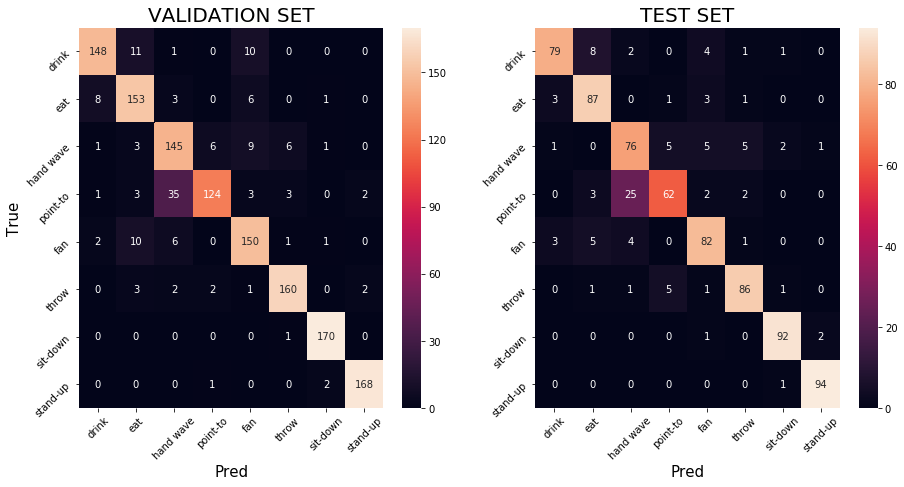

In [7]:
from os import scandir
from os.path import basename
from keras.models import load_model
import pickle
import dill
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# for model_to_analyse in model_names:
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
SAVED_MODEL_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/savedModels/"
datasetName = DATASET_FOLDER+"PoseNet-101"+"-SPLIT-dataset.pickle"
with open(datasetName,'rb') as file_in:
    train_set, val_set, test_set = pickle.load(file_in)
# for saved_model in savedModels:
#         modelName, preprocess_functions, normalise = fromFileNameToParameters(saved_model)
# modelName, normalise = fromFileNameToModel(saved_model)

saved_model = "PoseNet-101-relativeToVideoCenter-norm"
modelName = "PoseNet-101"
normalise = True
# if modelName != model_to_analyse:
#     continue

### LOAD accessories
accessoriesPath = "PoseNet-101-relativeToVideoCenter-norm"+".pickle"

with open(SAVED_MODEL_FOLDER+accessoriesPath,"rb") as handle:
    res = pickle.load(handle)

loaded_functions = [dill.loads(x) for x in res["prep_fun_DILL"]]

one_hot_encoding = loaded_functions[0]
normaliseBeforePadding = loaded_functions[1]
paddingTrainValTest = loaded_functions[2]
preprocessData = loaded_functions[3]
specificFunction = loaded_functions[4]

X_train, y_train, X_val, y_val, X_test, y_test = preprocessData(train_set, val_set, test_set, normalise, specificFunction)
#         ## reshaping ###
#         X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 17 * 2) 
#         X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 17 * 2) 
#         X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 17 * 2)
loadedModel = load_model(SAVED_MODEL_FOLDER+saved_model+".h5")
print(basename(saved_model))
val_acc, test_acc = plotValTestResult(loadedModel, X_val, y_val, X_test, y_test)
# results.append((val_acc, test_acc, saved_model, res["history"]))

In [20]:
results

[(0.8695970695970696,
  0.8735177865612648,
  <DirEntry 'PoseNet-101-relativeToUpperMiddleBottomCentersOfVideo.h5'>,
  <keras.callbacks.callbacks.History at 0x7ff6bd8b8eb8>),
 (0.2915750915750916,
  0.2845849802371542,
  <DirEntry 'PoseNet-101-relativeToVideoCenter.h5'>,
  <keras.callbacks.callbacks.History at 0x7ff833d48ac8>),
 (0.8652014652014652,
  0.8326745718050066,
  <DirEntry 'PoseNet-101-relativeToUpperMiddleBottomCentersOfFrame.h5'>,
  <keras.callbacks.callbacks.History at 0x7ff822ab68d0>),
 (0.21318681318681318,
  0.18708827404479578,
  <DirEntry 'PoseNet-101-relativeToFrameCenter.h5'>,
  <keras.callbacks.callbacks.History at 0x7ff5c21d4128>),
 (0.16923076923076924,
  0.1686429512516469,
  <DirEntry 'PoseNet-101-relativeToVideoCenter-norm.h5'>,
  <keras.callbacks.callbacks.History at 0x7ff5b76aaef0>),
 (0.20805860805860807,
  0.19367588932806323,
  <DirEntry 'PoseNet-101-relativeToFrameCenter-norm.h5'>,
  <keras.callbacks.callbacks.History at 0x7ff824479940>),
 (0.87545787545

Val acc: 0.8864468864468864
Test acc: 0.8511198945981555


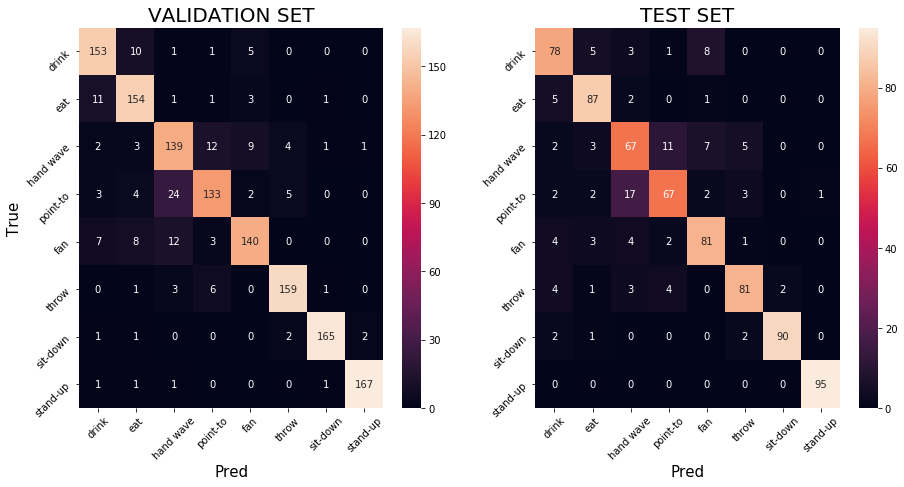

In [34]:
label_order = [1, 2, 31, 38, 49, 7, 8, 9]
model = loadedModel
y_val_pred = [label_order[i] for i in model.predict_classes(X_val)]
y_val_true = [label_order[np.argmax(i)] for i in y_val]
y_test_pred = [label_order[i] for i in model.predict_classes(X_test)]
y_test_true = [label_order[np.argmax(i)] for i in y_test]
val_acc = accuracy_score(y_pred=y_val_pred,y_true=y_val_true)
test_acc = accuracy_score(y_pred=y_test_pred,y_true=y_test_true)
print("Val acc:",val_acc)
print("Test acc:",test_acc)
conf_mat_val= confusion_matrix(y_true=y_val_true, y_pred=y_val_pred, labels=label_order)            
conf_mat_test = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred, labels=label_order)
plotConfusionMatrixes(conf_mat_val,conf_mat_test)

In [21]:
y_val_pred

[31,
 2,
 1,
 1,
 2,
 49,
 1,
 7,
 9,
 7,
 1,
 38,
 2,
 8,
 7,
 8,
 1,
 9,
 8,
 2,
 38,
 2,
 38,
 2,
 1,
 1,
 31,
 38,
 31,
 2,
 49,
 31,
 7,
 1,
 31,
 49,
 31,
 31,
 9,
 8,
 49,
 31,
 7,
 2,
 49,
 49,
 38,
 38,
 49,
 9,
 31,
 49,
 2,
 31,
 38,
 7,
 49,
 31,
 1,
 49,
 1,
 38,
 8,
 7,
 31,
 49,
 9,
 9,
 8,
 8,
 7,
 8,
 2,
 7,
 49,
 7,
 2,
 8,
 7,
 7,
 1,
 7,
 31,
 8,
 2,
 7,
 2,
 31,
 31,
 8,
 38,
 9,
 38,
 2,
 9,
 31,
 7,
 8,
 38,
 2,
 31,
 8,
 7,
 49,
 31,
 8,
 49,
 8,
 1,
 38,
 9,
 8,
 2,
 49,
 8,
 38,
 9,
 2,
 49,
 31,
 38,
 38,
 1,
 7,
 31,
 7,
 49,
 49,
 9,
 49,
 8,
 1,
 49,
 9,
 31,
 1,
 1,
 1,
 8,
 7,
 8,
 49,
 9,
 1,
 7,
 8,
 31,
 2,
 38,
 2,
 31,
 8,
 8,
 7,
 2,
 7,
 38,
 49,
 31,
 8,
 49,
 8,
 49,
 49,
 38,
 7,
 9,
 9,
 38,
 7,
 2,
 8,
 2,
 9,
 38,
 8,
 8,
 8,
 7,
 49,
 9,
 8,
 2,
 8,
 31,
 8,
 9,
 38,
 8,
 38,
 31,
 49,
 9,
 8,
 9,
 31,
 49,
 2,
 31,
 1,
 9,
 38,
 8,
 1,
 8,
 8,
 7,
 49,
 1,
 9,
 1,
 38,
 8,
 1,
 8,
 9,
 2,
 49,
 2,
 8,
 1,
 2,
 7,
 1,
 2,
 38,
 49,
 2,
 31,

In [128]:
from os import scandir
from os.path import basename
from keras.models import load_model
savedModels = [f for f in scandir(SAVED_MODEL_FOLDER) if f.path[-3:] == ".h5"]
model_names = ["PoseNet-101","keypoint_rcnn_X_101_32x8d_FPN_3x"]
results = []
for model_to_analyse in model_names:
    datasetName = DATASET_FOLDER+model_to_analyse+"-SPLIT-dataset.pickle"
    with open(datasetName,'rb') as file_in:
        train_set, val_set, test_set = pickle.load(file_in)
    for saved_model in savedModels:
        modelName, preprocess_functions, normalise = fromFileNameToParameters(saved_model)
        if modelName != model_to_analyse:
            continue
        X_train, y_train, X_val, y_val, X_test, y_test = preprocessData(train_set, val_set, test_set, normalise, preprocess_functions)
        loadedModel = load_model(SAVED_MODEL_FOLDER+saved_model.name)
        print(basename(saved_model))
        val_acc, test_acc = getValTestAccuracy(loadedModel, X_val, y_val, X_test, y_test)
        print("Validation accuracy:",val_acc,"\nTest accuracy:",test_acc)
        results.append((basename(saved_model),val_acc, test_acc))
#         plotValTestResult(loadedModel, X_val, y_val, X_test, y_test)
print("DONE!")

classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each video
number of zeros train (after padding):		27738866 - 66.41%
number of zeros validation (after padding):	6942018 - 66.48%
number of zeros test (after padding):		3869268 - 66.64%
Dataset train shape:		 (5460, 225, 17, 2)
Dataset validation shape:	 (1365, 225, 17, 2)
Dataset test shape:		 (759, 225, 17, 2)
PoseNet-101-relativeToVideoCenter.h5
Validation accuracy: 0.8688644688644689 
Test accuracy: 0.8511198945981555
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
classes order: ['1' '2' '23' '31' '49' '7' '8' '9']
Adapting the data to the center of each video
Adapting the data to the center of each video
Adapting the data to the center of each vid

In [114]:
loadedModel = load_model(SAVED_MODEL_FOLDER+saved_model.name)

## continue training

In [13]:
# modelName = 'simple-model.h5'

In [14]:
# from keras.models import load_model
# model = load_model(modelName)

#Continue training
# model.fit(second_training, second_classes, batch_size=32, nb_epoch=20)

# history = model.fit(X_train, y_train,
#                     epochs=EPOCHS,
#                     batch_size=BATCH_SIZE,
# #                     validation_split=0.2
#                     validation_data=(X_val, y_val)
#                    )

Train on 5460 samples, validate on 1365 samples
Epoch 1/10
5460/5460 [==============================] - 35s 6ms/step - loss: 1.2101 - accuracy: 0.4623 - val_loss: 1.2212 - val_accuracy: 0.4718
Epoch 2/10
 368/5460 [=>............................] - ETA: 29s - loss: 1.1121 - accuracy: 0.4810

KeyboardInterrupt: 

# Display classification

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

label_order = [1, 2, 31, 38, 49, 7, 8, 9]
y_pred = loadedModel.predict_classes(X_val)
# label_order = ["1", "2", "31", "38", "49", "7", "8", "9"]
y_pred_labels = [label_order[i] for i in y_pred]
y_val_labels = [label_order[np.argmax(i)] for i in y_val]

In [45]:
accuracy_score(y_pred=y_pred_labels,y_true=y_val_labels)

0.8827838827838828

In [46]:
yTrue=y_pred_labels
yPred=y_test_labels
conf_mat = confusion_matrix(y_true=yTrue, y_pred=yPred, labels=label_order)
conf_mat

array([[133,  16,   4,   4,   8,   0,   0,   0],
       [ 10, 110,   4,   1,  12,   2,   0,   0],
       [  3,   5, 130,   8,   3,   4,   0,   0],
       [  6,   1,   2, 108,   6,   1,   1,   0],
       [  3,   4,   2,   1, 113,   1,   0,   0],
       [  0,   0,   3,   2,   0, 119,   0,   1],
       [  0,   0,   1,   0,   1,   2, 130,   0],
       [  0,   0,   1,   0,   0,   1,   4, 121]])

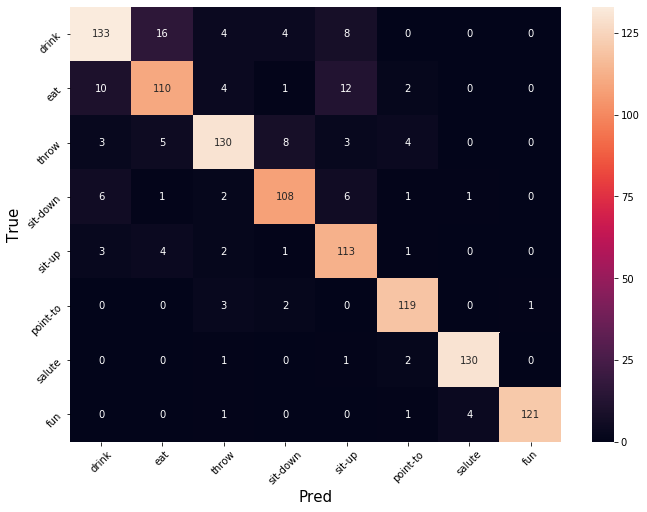

In [41]:
import seaborn as sn
plt.figure(figsize = (11,8))
ax = plt.axes()
labelString = ["drink", "eat", "throw", "sit-down", "sit-up", "point-to", "salute", "fun"]
ax = sn.heatmap(conf_mat, annot=True,xticklabels=labelString,yticklabels=labelString, fmt='g')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# plt.title('', fontsize = 20) # title with fontsize 20
plt.xlabel('Pred', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True', fontsize = 15) # y-axis label with fontsize 15

plt.show()

# ACTION_LABEL_SET = 
# A001  - A002 - A007 - A008     - A009   - A031               - A038   -  A049
# drink - eat - throw - sit down - sit up - point to something - salute - make a fun 


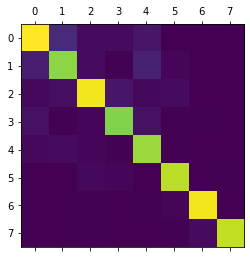

In [42]:
plt.matshow(conf_mat)